In [1]:
import math as mt
import numpy as np
import pandas as pd
import regex as re
import scipy.stats as st

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aerofit_data = pd.read_csv("aerofit_treadmill.txt")

aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit_data.shape

(180, 9)

In [5]:
aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Product Portfolio:

* The KP281: is an entry-level treadmill that sells for \$1,500
* The KP481: is for mid-level runners that sell for \$1,750
* The KP781: treadmill is having advanced features that sell for \$2,500

In [6]:
conditions = [
    (aerofit_data['Product'] == "KP281"),
    (aerofit_data['Product'] == "KP481"),
    (aerofit_data['Product'] == "KP781"),
]

choices = [1500, 1750, 2500]

aerofit_data['Price'] = np.select(conditions, choices, default= np.nan)


aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0


In [7]:
aerofit_data.describe(include= np.number)

,Age,Education,Usage,Fitness,Income,Miles,Price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


In [8]:
aerofit_data.describe(include= object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


### Goal

#### The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to **create a customer profile for each AeroFit treadmill** product by developing appropriate tables and charts.
* For each AeroFit treadmill product, **construct two-way contingency tables** and compute all conditional and marginal probabilities along with their insights/impact on the business.

#### Steps:

* Distribution, Outliers of each column
* Pairplot & Heatmap among the non-product columns
* Pairplot as above with Product as hue
* Product vs each other column heatmap
* Get insights about outliers, redundant columns and useful column to determine the product purchased
* Re-engineer the dataset for Crosstab analysis
* Crosstab for each product vs dependant variable columns

In [9]:
aerofit_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Price'],
      dtype='object')

#### Product

<AxesSubplot:xlabel='Product', ylabel='count'>

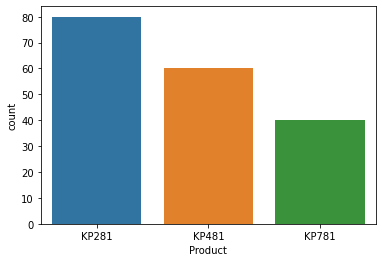

In [10]:
sns.countplot(data= aerofit_data, x= "Product")

<AxesSubplot:ylabel='Product'>

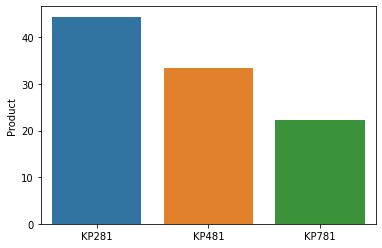

In [11]:
sns.barplot(x= np.unique(aerofit_data[["Product"]]),
            y= (aerofit_data["Product"].value_counts()/aerofit_data.shape[0])*100
           )

##### Observations:
1. KP281 is the most selling product
2. KP481 is the scond most selling
3. KP781 is sold comparatively the least

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

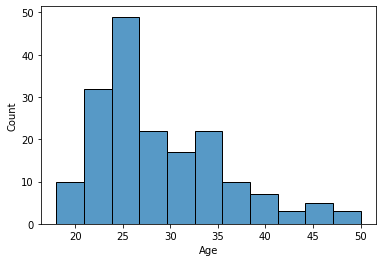

In [12]:
sns.histplot(data= aerofit_data, x= "Age")

<AxesSubplot:xlabel='Age', ylabel='Density'>

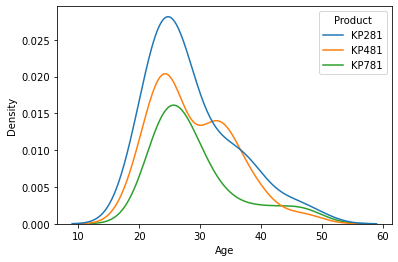

In [13]:
sns.kdeplot(data= aerofit_data, x= "Age", hue= "Product")

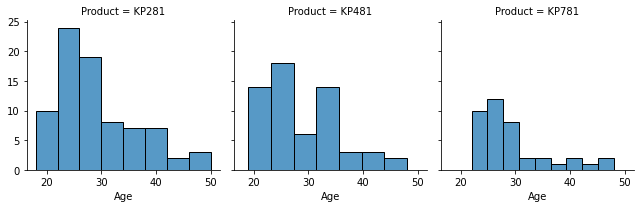

In [14]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.histplot, "Age")

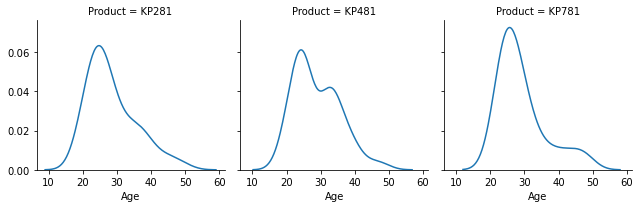

In [15]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Age")

<AxesSubplot:xlabel='Product', ylabel='Age'>

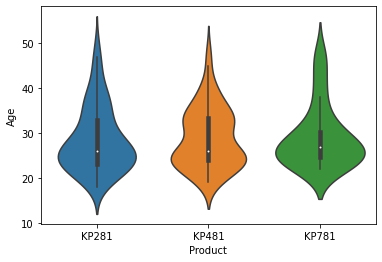

In [16]:
sns.violinplot(data= aerofit_data, y= "Age", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Age'>

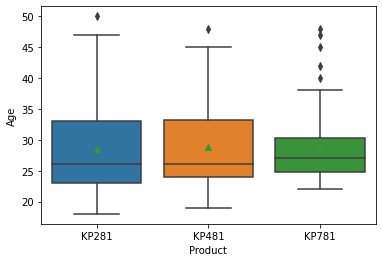

In [17]:
sns.boxplot(data= aerofit_data, y= "Age", x= "Product", showmeans= True)

##### Observations
1. There is no direct correlation between the Produst purchased and the age of the customer

#### Price

<AxesSubplot:xlabel='Education', ylabel='count'>

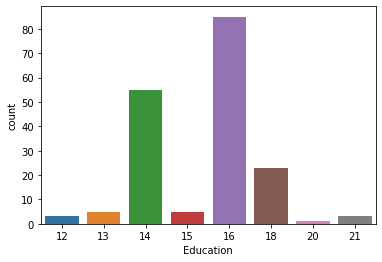

In [18]:
sns.countplot(data= aerofit_data, x= "Education")

<AxesSubplot:xlabel='Education', ylabel='Density'>

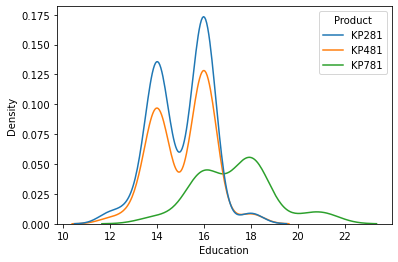

In [19]:
sns.kdeplot(data= aerofit_data, x= "Education", hue= "Product")

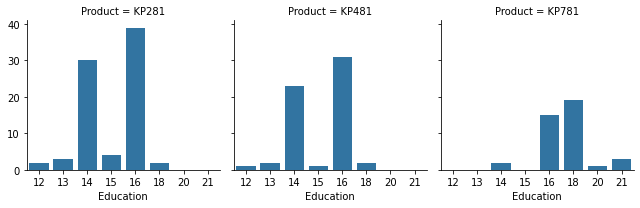

In [20]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.countplot, "Education", order= np.sort(aerofit_data.Education.unique()))

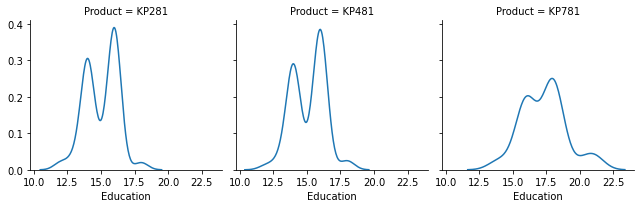

In [21]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Education")

<AxesSubplot:xlabel='Product', ylabel='Education'>

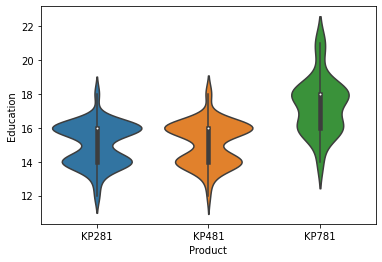

In [22]:
sns.violinplot(data= aerofit_data, y= "Education", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Education'>

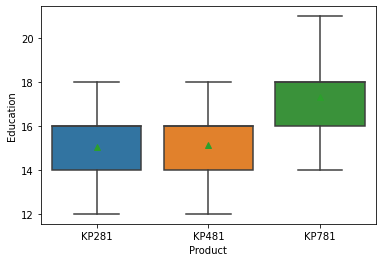

In [23]:
sns.boxplot(data= aerofit_data, y= "Education", x= "Product", showmeans= True)

##### Observations:
1. The demographic for the KP781 is more educated that the other two
2. There is no discernable difference between the demographic for KP281 and KP481

#### Usage

<AxesSubplot:xlabel='Usage', ylabel='count'>

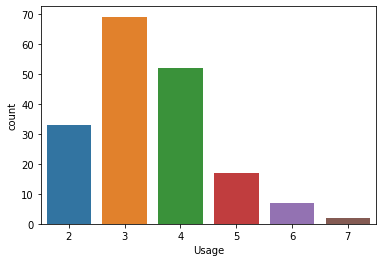

In [24]:
sns.countplot(data= aerofit_data, x= "Usage")

<AxesSubplot:xlabel='Usage', ylabel='Density'>

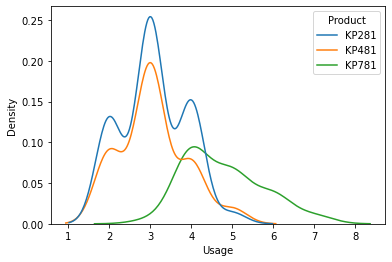

In [25]:
sns.kdeplot(data= aerofit_data, x= "Usage", hue= "Product")

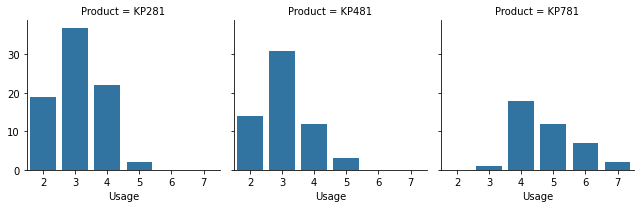

In [26]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.countplot, "Usage", order= np.sort(aerofit_data.Usage.unique()))

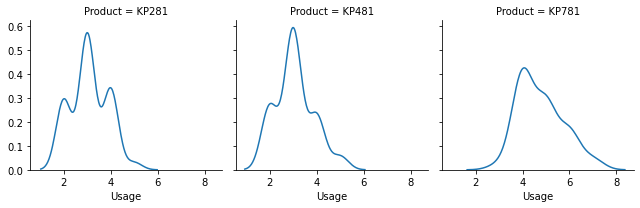

In [27]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Usage")

<AxesSubplot:xlabel='Product', ylabel='Usage'>

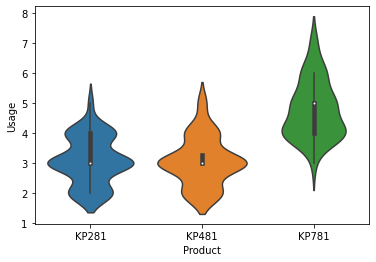

In [28]:
sns.violinplot(data= aerofit_data, y= "Usage", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Usage'>

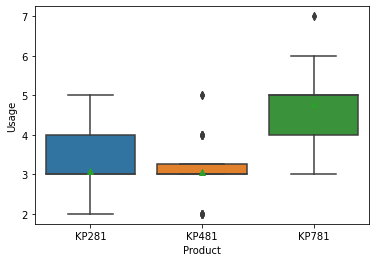

In [29]:
sns.boxplot(data= aerofit_data, y= "Usage", x= "Product", showmeans= True)

##### Observations:
1. The product usage is highest for KP781
2. The product usage has similar demographic for both KP281 and KP481

#### Fitness

<AxesSubplot:xlabel='Fitness', ylabel='count'>

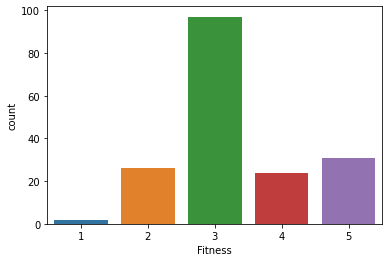

In [30]:
sns.countplot(data= aerofit_data, x= "Fitness")

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

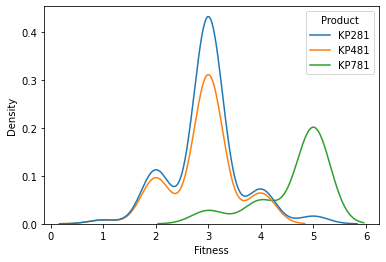

In [31]:
sns.kdeplot(data= aerofit_data, x= "Fitness", hue= "Product")

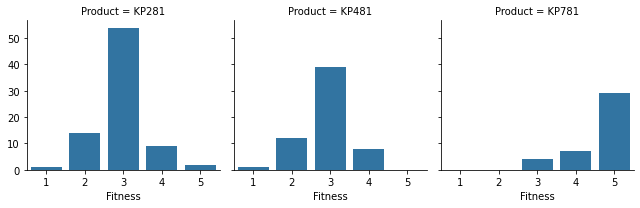

In [32]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.countplot, "Fitness", order= np.sort(aerofit_data.Fitness.unique()))

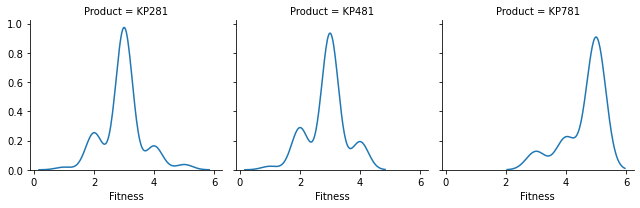

In [33]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Fitness")

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

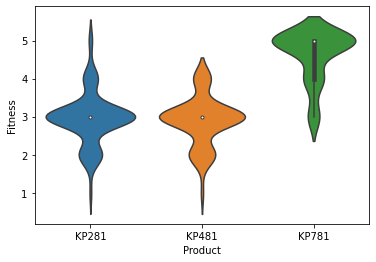

In [34]:
sns.violinplot(data= aerofit_data, y= "Fitness", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

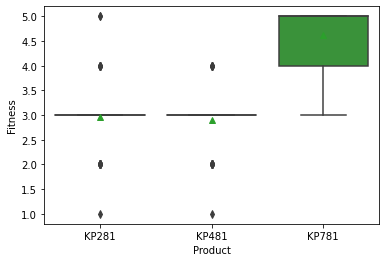

In [35]:
sns.boxplot(data= aerofit_data, y= "Fitness", x= "Product", showmeans= True)

##### Observations:
1. The product KP781 is used mostly by highly fit people
2. The products KP281 and KP481 are used for boith people

#### Income

<AxesSubplot:xlabel='Income', ylabel='Count'>

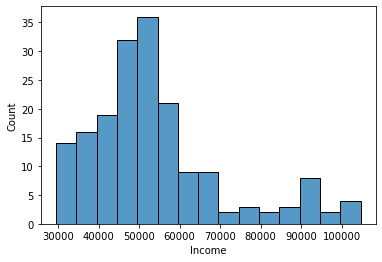

In [36]:
sns.histplot(data= aerofit_data, x= "Income")

<AxesSubplot:xlabel='Income', ylabel='Density'>

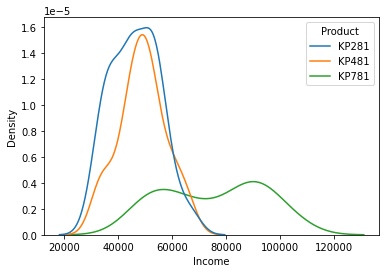

In [37]:
sns.kdeplot(data= aerofit_data, x= "Income", hue= "Product")

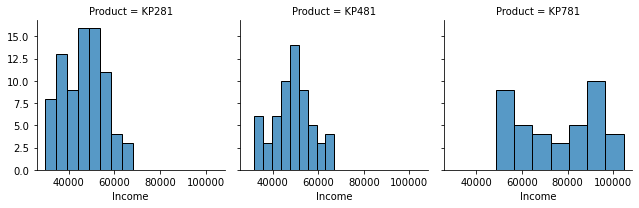

In [38]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.histplot, "Income")

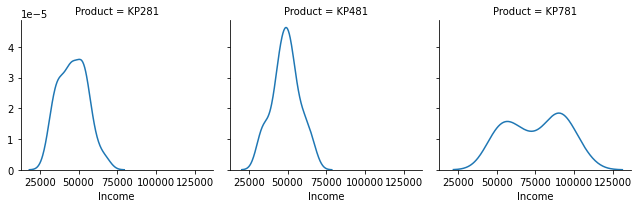

In [39]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Income")

<AxesSubplot:xlabel='Product', ylabel='Income'>

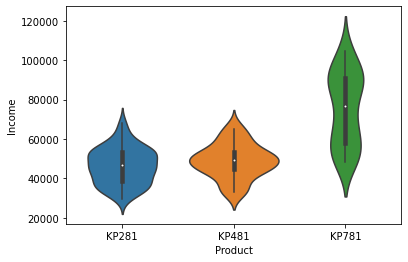

In [40]:
sns.violinplot(data= aerofit_data, y= "Income", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Income'>

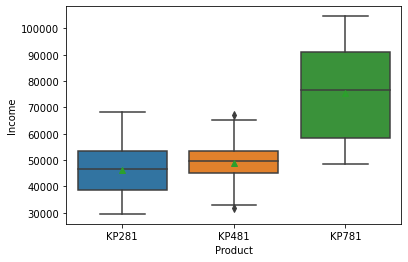

In [41]:
sns.boxplot(data= aerofit_data, y= "Income", x= "Product", showmeans= True)

##### Observations:
1. The income for the customers of KP781 is very high (> 60000)
2. The income for the coustomers of KP281 and KP481 are similar and relatively low
3. Among the customers with least income (< 45000) most are users of KP281

#### Miles

<AxesSubplot:xlabel='Miles', ylabel='Count'>

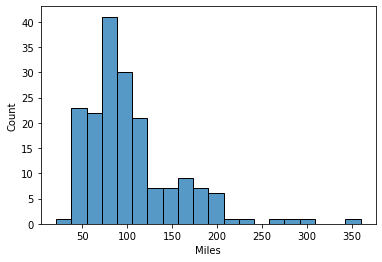

In [42]:
sns.histplot(data= aerofit_data, x= "Miles")

<AxesSubplot:xlabel='Miles', ylabel='Density'>

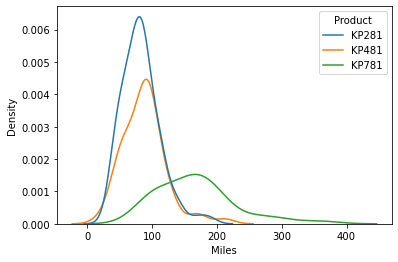

In [43]:
sns.kdeplot(data= aerofit_data, x= "Miles", hue= "Product")

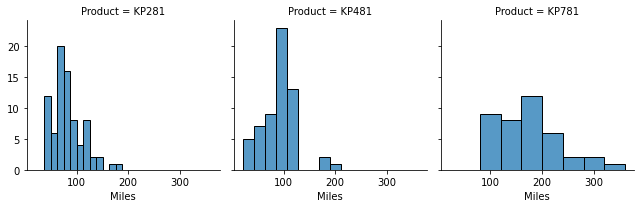

In [44]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.histplot, "Miles")

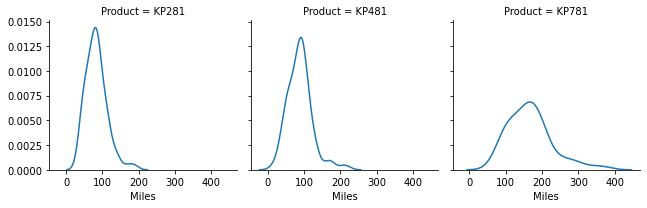

In [45]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Miles")

<AxesSubplot:xlabel='Product', ylabel='Miles'>

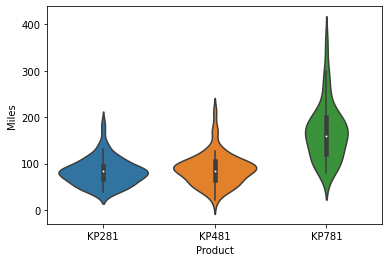

In [46]:
sns.violinplot(data= aerofit_data, y= "Miles", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Miles'>

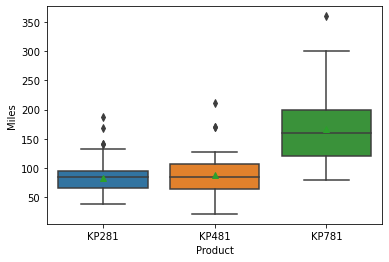

In [47]:
sns.boxplot(data= aerofit_data, y= "Miles", x= "Product", showmeans= True)

##### Observations:
1. The customers for KP781 run more miles
2. The customers for KP281 and KP481 run fewer miles
3. Among the customers who run less than 90 miles marginally most are the users of KP281

### Gender

#### Price

<AxesSubplot:xlabel='Price', ylabel='count'>

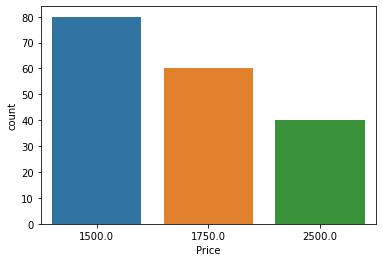

In [48]:
sns.countplot(data= aerofit_data, x= "Price")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

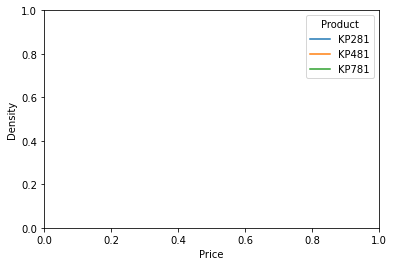

In [49]:
sns.kdeplot(data= aerofit_data, x= "Price", hue= "Product")

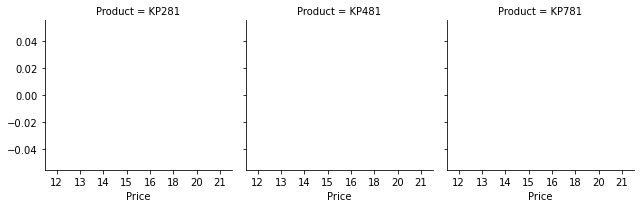

In [50]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.countplot, "Price", order= np.sort(aerofit_data.Education.unique()))

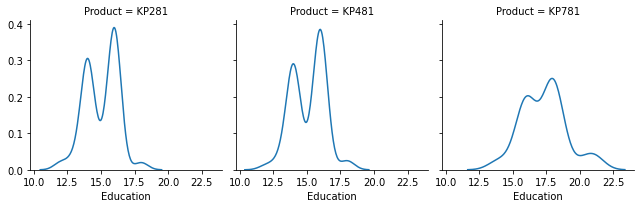

In [51]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Product")

snsgrid.map(sns.kdeplot, "Education")

<AxesSubplot:xlabel='Product', ylabel='Education'>

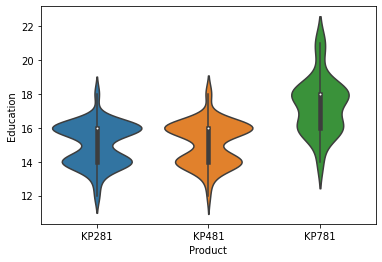

In [52]:
sns.violinplot(data= aerofit_data, y= "Education", x= "Product", showmeans= True)

<AxesSubplot:xlabel='Product', ylabel='Education'>

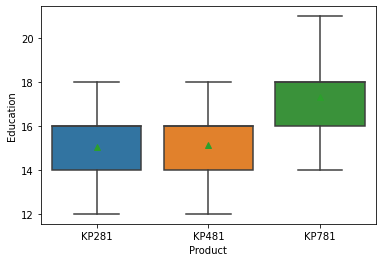

In [53]:
sns.boxplot(data= aerofit_data, y= "Education", x= "Product", showmeans= True)

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

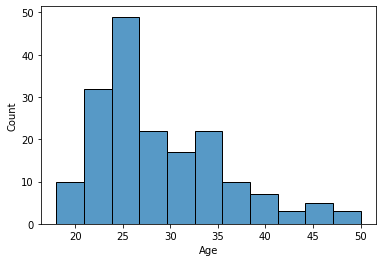

In [54]:
sns.histplot(data= aerofit_data, x= "Age")

<AxesSubplot:xlabel='Age', ylabel='Density'>

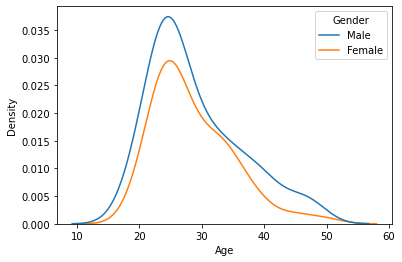

In [55]:
sns.kdeplot(data= aerofit_data, x= "Age", hue= "Gender")

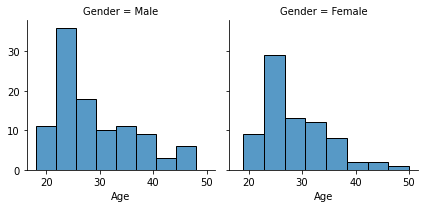

In [56]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.histplot, "Age")

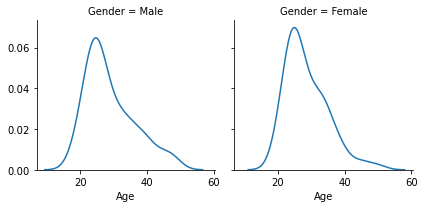

In [57]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Age")

<AxesSubplot:xlabel='Gender', ylabel='Age'>

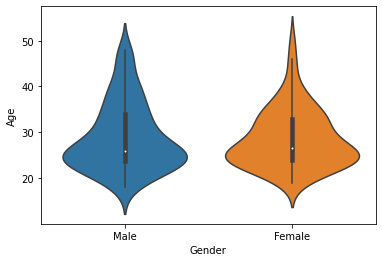

In [58]:
sns.violinplot(data= aerofit_data, y= "Age", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

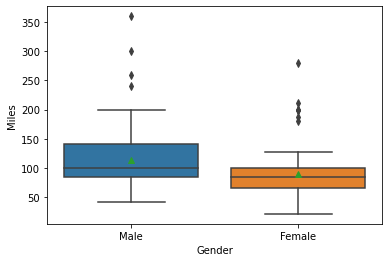

In [59]:
sns.boxplot(data= aerofit_data, y= "Miles", x= "Gender", showmeans= True)

##### Observations:
1. There is not much difference between the age distibution for males and females

#### Education

<AxesSubplot:xlabel='Education', ylabel='count'>

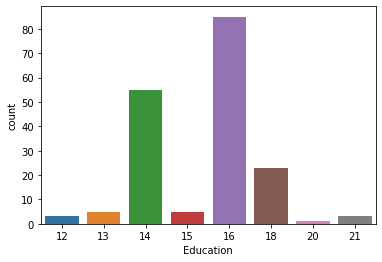

In [60]:
sns.countplot(data= aerofit_data, x= "Education")

<AxesSubplot:xlabel='Education', ylabel='Density'>

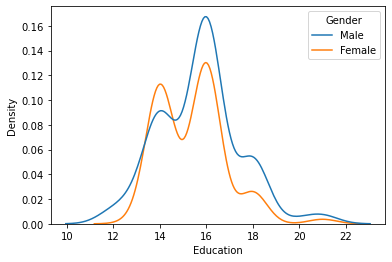

In [61]:
sns.kdeplot(data= aerofit_data, x= "Education", hue= "Gender")

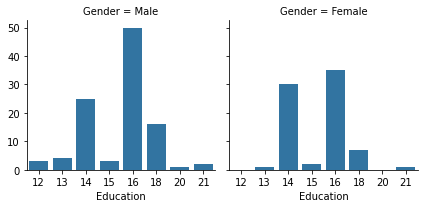

In [62]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.countplot, "Education", order= np.sort(aerofit_data.Education.unique()))

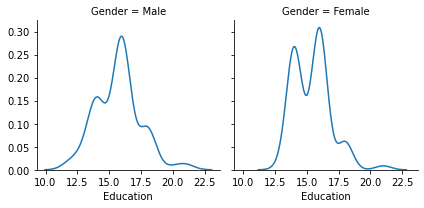

In [63]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Education")

<AxesSubplot:xlabel='Gender', ylabel='Education'>

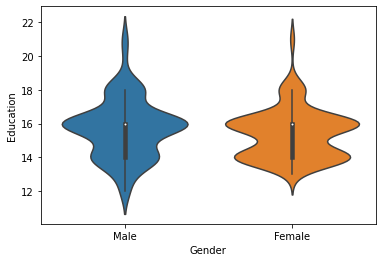

In [64]:
sns.violinplot(data= aerofit_data, y= "Education", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Education'>

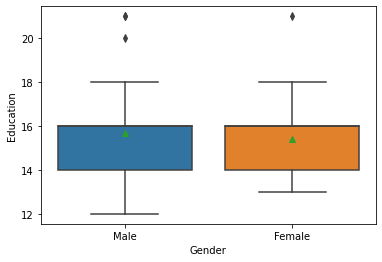

In [65]:
sns.boxplot(data= aerofit_data, y= "Education", x= "Gender", showmeans= True)

##### Observations:
1. There is not much difference between the education of males and females

#### Usage

<AxesSubplot:xlabel='Usage', ylabel='count'>

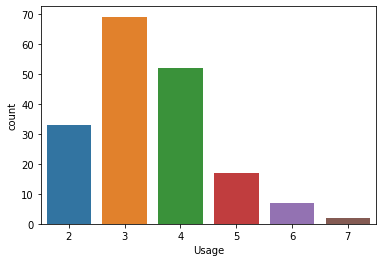

In [66]:
sns.countplot(data= aerofit_data, x= "Usage")

<AxesSubplot:xlabel='Usage', ylabel='Density'>

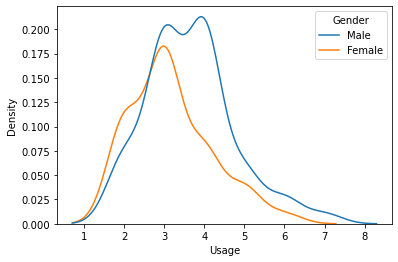

In [67]:
sns.kdeplot(data= aerofit_data, x= "Usage", hue= "Gender")

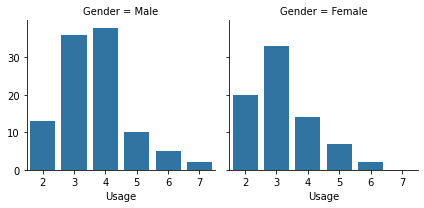

In [68]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.countplot, "Usage", order= np.sort(aerofit_data.Usage.unique()))

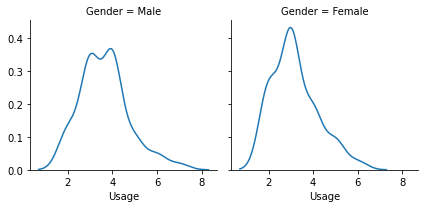

In [69]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Usage")

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

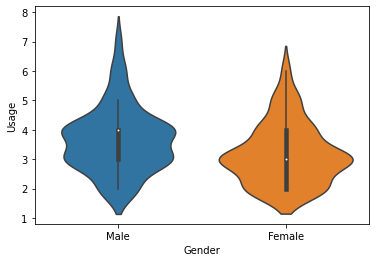

In [70]:
sns.violinplot(data= aerofit_data, y= "Usage", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

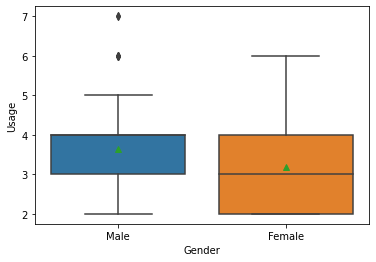

In [71]:
sns.boxplot(data= aerofit_data, y= "Usage", x= "Gender", showmeans= True)

##### Observations:
1. Except for a few outliers in male users there is not much difference between the usage for males and females

#### Fitness

<AxesSubplot:xlabel='Fitness', ylabel='count'>

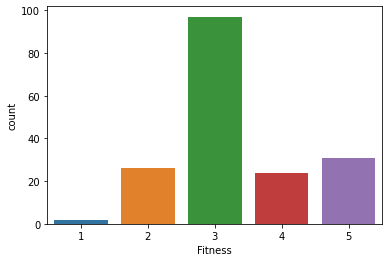

In [72]:
sns.countplot(data= aerofit_data, x= "Fitness")

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

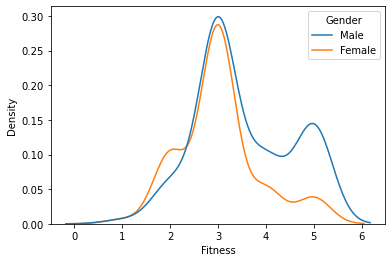

In [73]:
sns.kdeplot(data= aerofit_data, x= "Fitness", hue= "Gender")

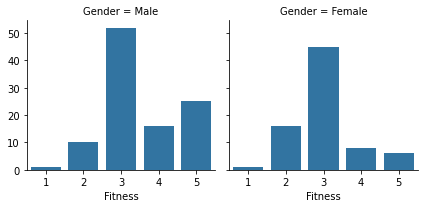

In [74]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.countplot, "Fitness", order= np.sort(aerofit_data.Fitness.unique()))

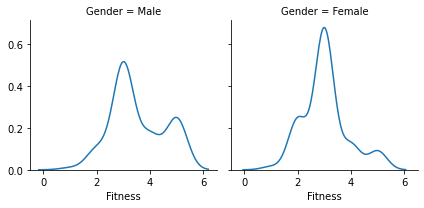

In [75]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Fitness")

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

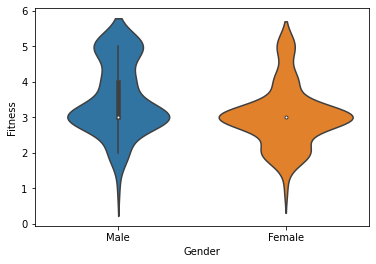

In [76]:
sns.violinplot(data= aerofit_data, y= "Fitness", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

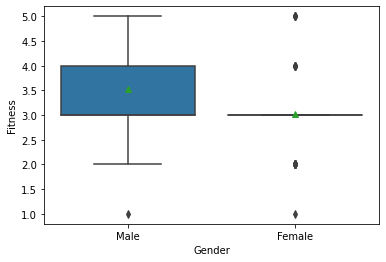

In [77]:
sns.boxplot(data= aerofit_data, y= "Fitness", x= "Gender", showmeans= True)

##### Observations:
1. Except for a few highly fit males the fitness for males and females is similar

#### Income

<AxesSubplot:xlabel='Income', ylabel='Count'>

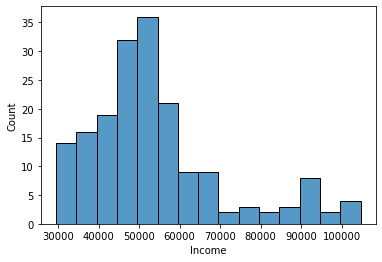

In [78]:
sns.histplot(data= aerofit_data, x= "Income")

<AxesSubplot:xlabel='Income', ylabel='Density'>

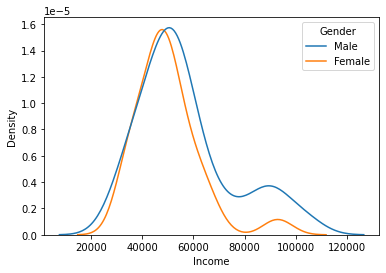

In [79]:
sns.kdeplot(data= aerofit_data, x= "Income", hue= "Gender")

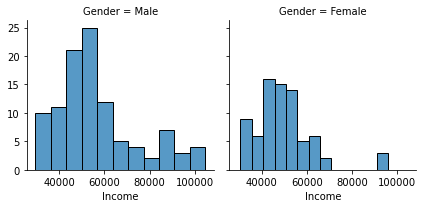

In [80]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.histplot, "Income")

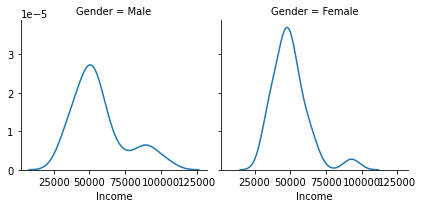

In [81]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Income")

<AxesSubplot:xlabel='Gender', ylabel='Income'>

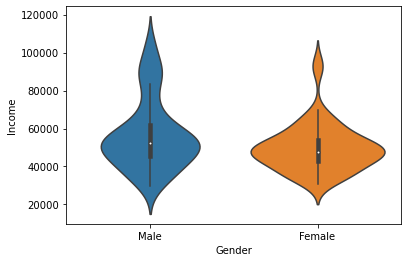

In [82]:
sns.violinplot(data= aerofit_data, y= "Income", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

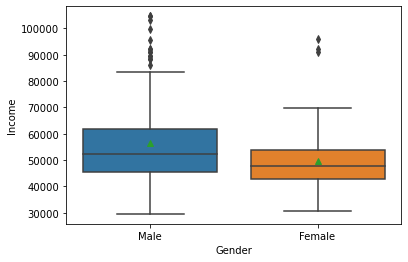

In [83]:
sns.boxplot(data= aerofit_data, y= "Income", x= "Gender", showmeans= True)

##### Observations:
1. The income for Males and Females is almost similar except that the variance of income for males is higher than that of females

#### Miles

<AxesSubplot:xlabel='Miles', ylabel='Count'>

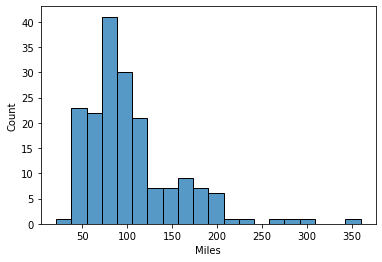

In [84]:
sns.histplot(data= aerofit_data, x= "Miles")

<AxesSubplot:xlabel='Miles', ylabel='Density'>

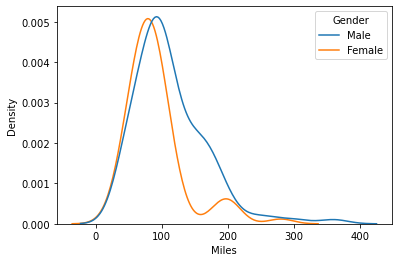

In [85]:
sns.kdeplot(data= aerofit_data, x= "Miles", hue= "Gender")

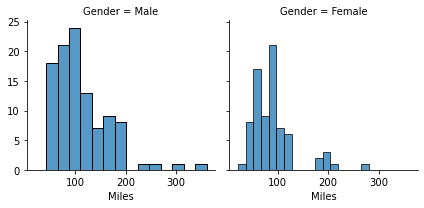

In [86]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.histplot, "Miles")

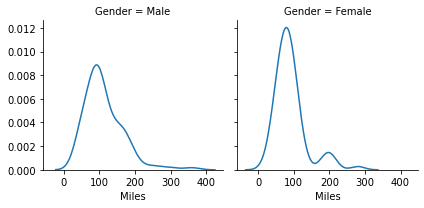

In [87]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Miles")

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

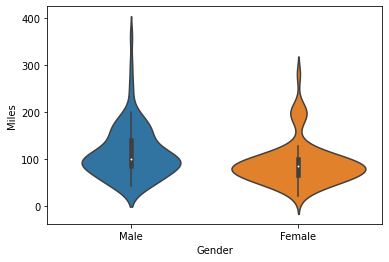

In [88]:
sns.violinplot(data= aerofit_data, y= "Miles", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

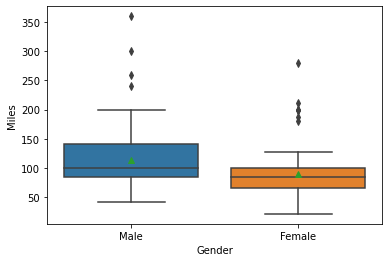

In [89]:
sns.boxplot(data= aerofit_data, y= "Miles", x= "Gender", showmeans= True)

##### Observations:
1. Females run the same no of miles as males among the users who run for less than 100 miles a week
2. The are more males who run longer males compared to females

#### Price

<AxesSubplot:xlabel='Price', ylabel='count'>

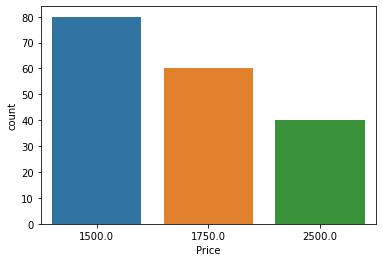

In [90]:
sns.countplot(data= aerofit_data, x= "Price")

<AxesSubplot:xlabel='Price', ylabel='Density'>

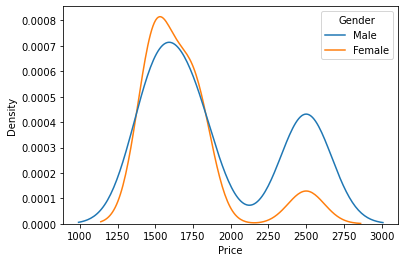

In [91]:
sns.kdeplot(data= aerofit_data, x= "Price", hue= "Gender")

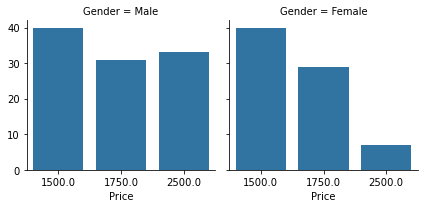

In [92]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.countplot, "Price", order= np.sort(aerofit_data.Price.unique()))

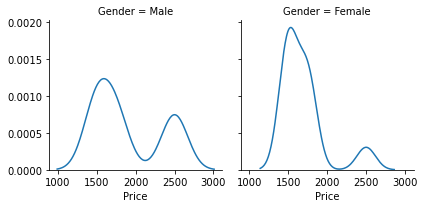

In [93]:
snsgrid = sns.FacetGrid(aerofit_data, col = "Gender")

snsgrid.map(sns.kdeplot, "Price")

<AxesSubplot:xlabel='Gender', ylabel='Price'>

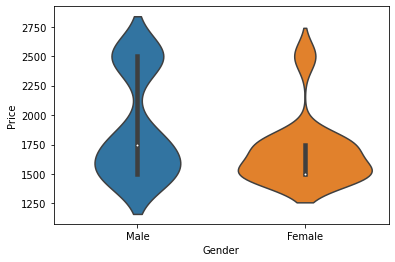

In [94]:
sns.violinplot(data= aerofit_data, y= "Price", x= "Gender", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Price'>

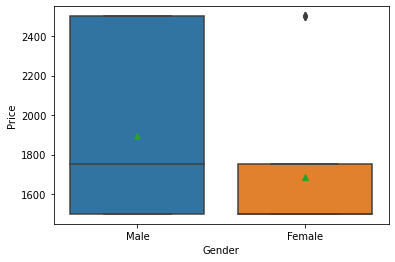

In [95]:
sns.boxplot(data= aerofit_data, y= "Price", x= "Gender", showmeans= True)

##### Observations:
1. The no of females who buy expensive products is lower compared to males
2. The no of males that buy a product is uniformly distributed

### Marital Status

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

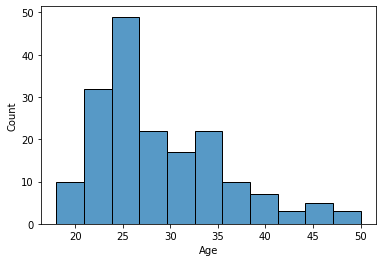

In [96]:
sns.histplot(data= aerofit_data, x= "Age")

<AxesSubplot:xlabel='Age', ylabel='Density'>

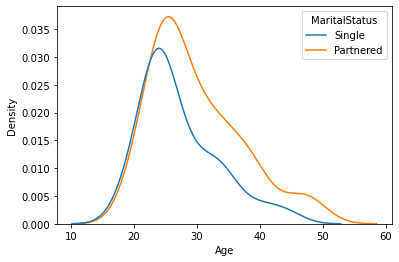

In [97]:
sns.kdeplot(data= aerofit_data, x= "Age", hue= "MaritalStatus")

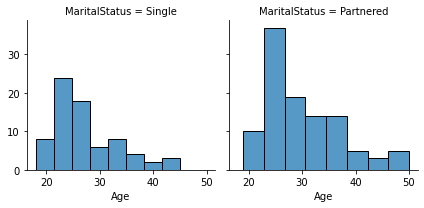

In [98]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.histplot, "Age")

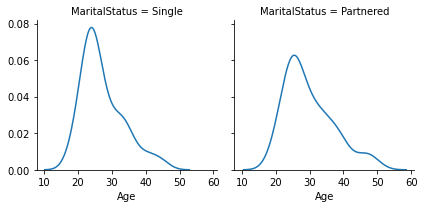

In [99]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Age")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

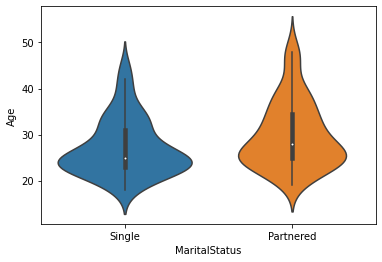

In [100]:
sns.violinplot(data= aerofit_data, y= "Age", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Miles'>

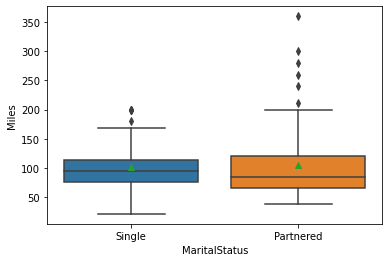

In [101]:
sns.boxplot(data= aerofit_data, y= "Miles", x= "MaritalStatus", showmeans= True)

#### Education

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

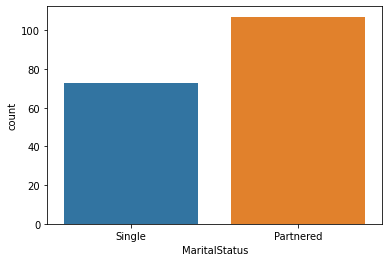

In [102]:
sns.countplot(data= aerofit_data, x= "MaritalStatus")

<AxesSubplot:xlabel='Education', ylabel='Density'>

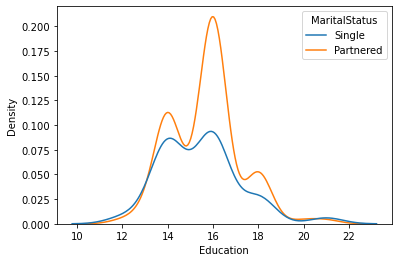

In [103]:
sns.kdeplot(data= aerofit_data, x= "Education", hue= "MaritalStatus")

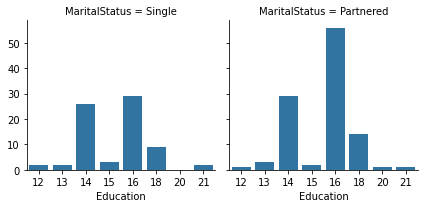

In [104]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.countplot, "Education", order= np.sort(aerofit_data.Education.unique()))

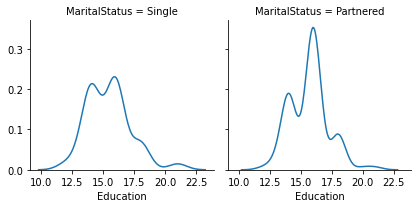

In [105]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Education")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Education'>

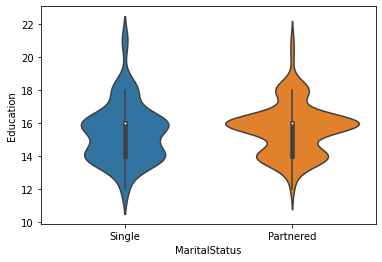

In [106]:
sns.violinplot(data= aerofit_data, y= "Education", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='Gender', ylabel='Education'>

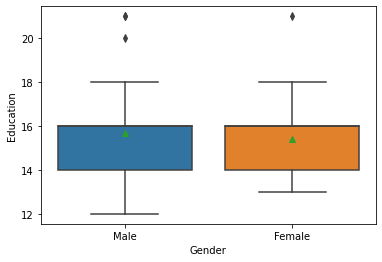

In [107]:
sns.boxplot(data= aerofit_data, y= "Education", x= "Gender", showmeans= True)

#### Usage

<AxesSubplot:xlabel='Usage', ylabel='count'>

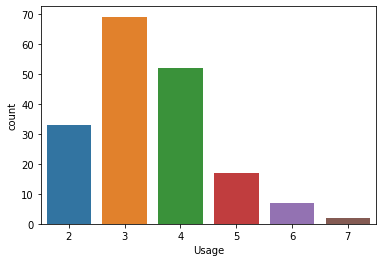

In [108]:
sns.countplot(data= aerofit_data, x= "Usage")

<AxesSubplot:xlabel='Usage', ylabel='Density'>

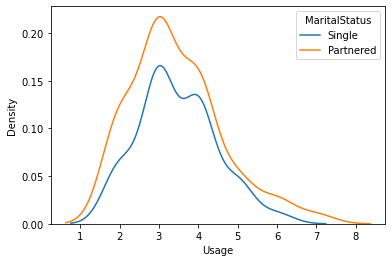

In [109]:
sns.kdeplot(data= aerofit_data, x= "Usage", hue= "MaritalStatus")

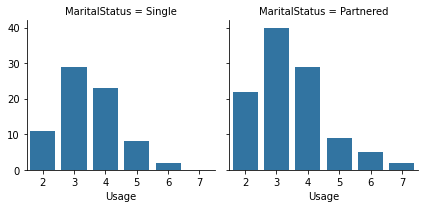

In [110]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.countplot, "Usage", order= np.sort(aerofit_data.Usage.unique()))

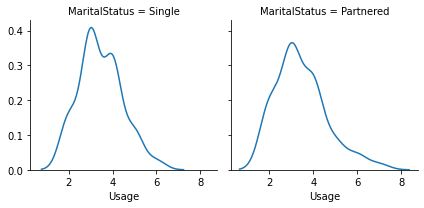

In [111]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Usage")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

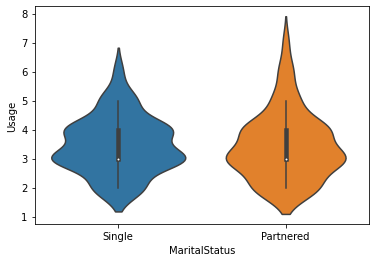

In [112]:
sns.violinplot(data= aerofit_data, y= "Usage", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

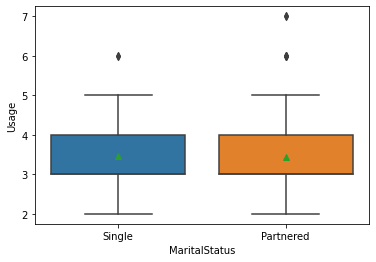

In [113]:
sns.boxplot(data= aerofit_data, y= "Usage", x= "MaritalStatus", showmeans= True)

#### Fitness

<AxesSubplot:xlabel='Fitness', ylabel='count'>

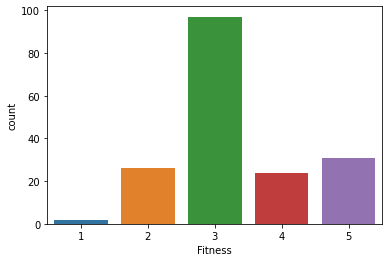

In [114]:
sns.countplot(data= aerofit_data, x= "Fitness")

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

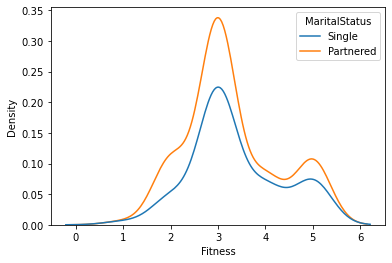

In [115]:
sns.kdeplot(data= aerofit_data, x= "Fitness", hue= "MaritalStatus")

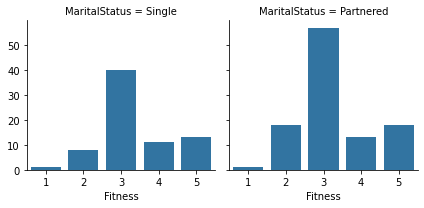

In [116]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.countplot, "Fitness", order= np.sort(aerofit_data.Fitness.unique()))

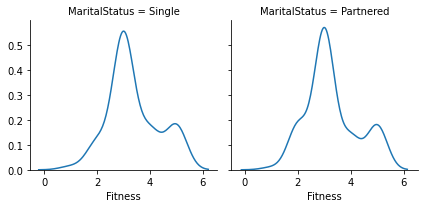

In [117]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Fitness")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Fitness'>

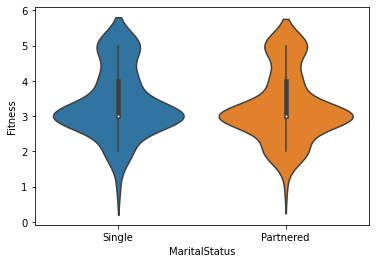

In [118]:
sns.violinplot(data= aerofit_data, y= "Fitness", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Fitness'>

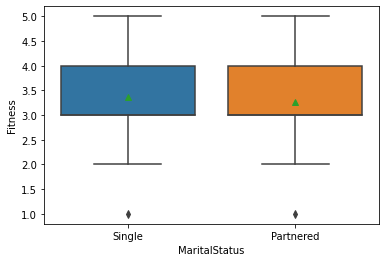

In [119]:
sns.boxplot(data= aerofit_data, y= "Fitness", x= "MaritalStatus", showmeans= True)

#### Income

<AxesSubplot:xlabel='Income', ylabel='Count'>

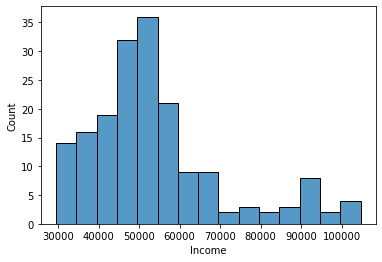

In [120]:
sns.histplot(data= aerofit_data, x= "Income")

<AxesSubplot:xlabel='Income', ylabel='Density'>

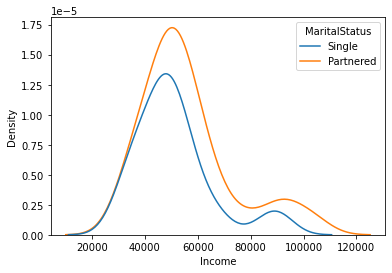

In [121]:
sns.kdeplot(data= aerofit_data, x= "Income", hue= "MaritalStatus")

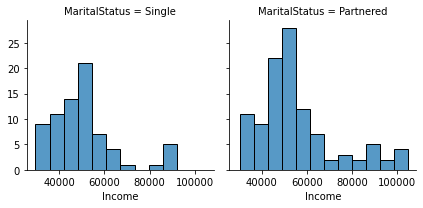

In [122]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.histplot, "Income")

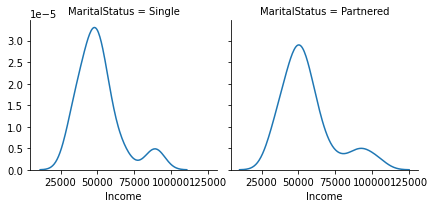

In [123]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Income")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

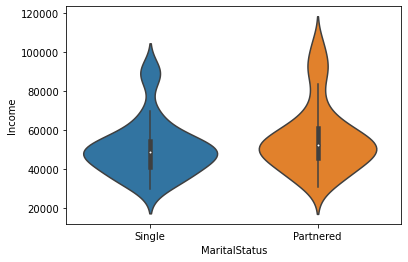

In [124]:
sns.violinplot(data= aerofit_data, y= "Income", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

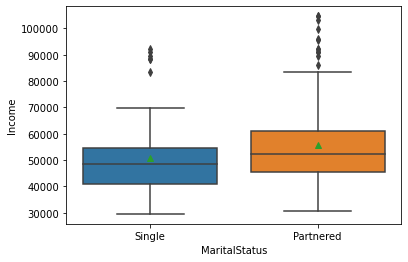

In [125]:
sns.boxplot(data= aerofit_data, y= "Income", x= "MaritalStatus", showmeans= True)

#### Miles

<AxesSubplot:xlabel='Miles', ylabel='Count'>

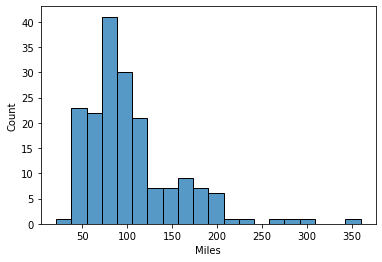

In [126]:
sns.histplot(data= aerofit_data, x= "Miles")

<AxesSubplot:xlabel='Miles', ylabel='Density'>

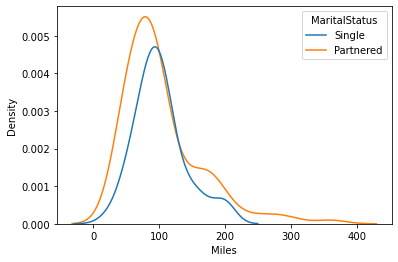

In [127]:
sns.kdeplot(data= aerofit_data, x= "Miles", hue= "MaritalStatus")

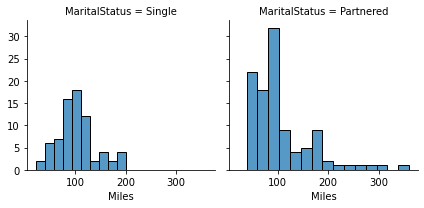

In [128]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.histplot, "Miles")

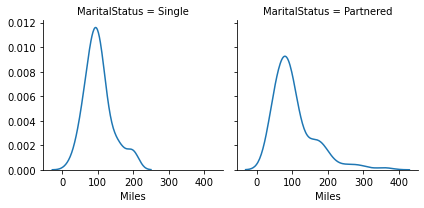

In [129]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Miles")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Miles'>

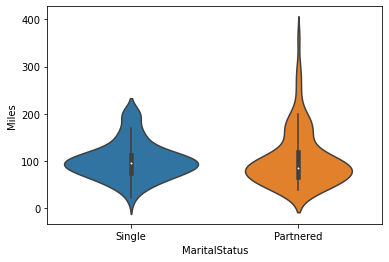

In [130]:
sns.violinplot(data= aerofit_data, y= "Miles", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Miles'>

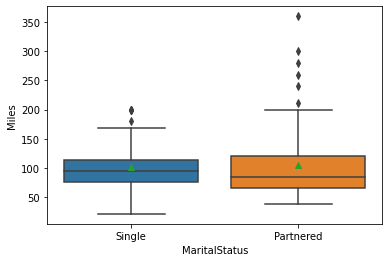

In [131]:
sns.boxplot(data= aerofit_data, y= "Miles", x= "MaritalStatus", showmeans= True)

#### Price

<AxesSubplot:xlabel='Price', ylabel='count'>

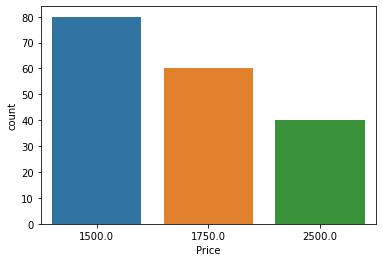

In [132]:
sns.countplot(data= aerofit_data, x= "Price")

<AxesSubplot:xlabel='Price', ylabel='Density'>

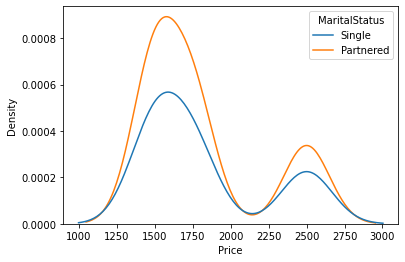

In [133]:
sns.kdeplot(data= aerofit_data, x= "Price", hue= "MaritalStatus")

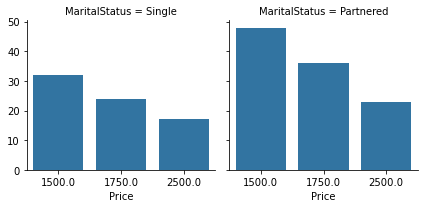

In [134]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.countplot, "Price", order= np.sort(aerofit_data.Price.unique()))

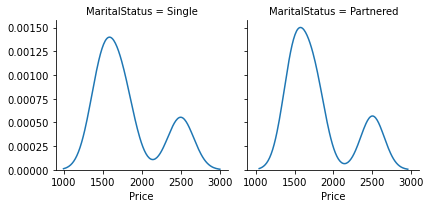

In [135]:
snsgrid = sns.FacetGrid(aerofit_data, col = "MaritalStatus")

snsgrid.map(sns.kdeplot, "Price")

<AxesSubplot:xlabel='MaritalStatus', ylabel='Price'>

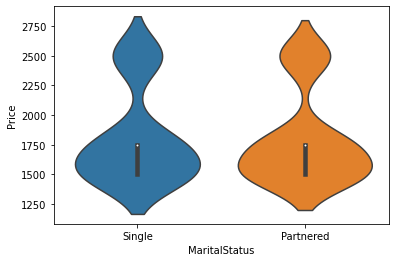

In [136]:
sns.violinplot(data= aerofit_data, y= "Price", x= "MaritalStatus", showmeans= True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Price'>

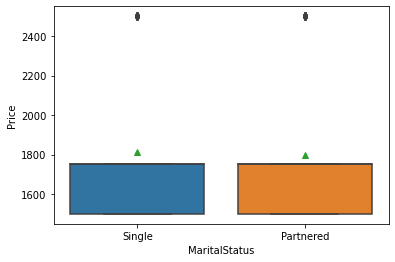

In [137]:
sns.boxplot(data= aerofit_data, y= "Price", x= "MaritalStatus", showmeans= True)

##### Observations:
1. MaritalStatus does not influence the distribution other than scaling it

#### Summary:
* There is no direct correlation between the Produst purchased and the age of the customer
* The demographic for the KP781 is more educated that the other two
* There is no discernable difference between the demographic for KP281 and KP481
* The product usage is highest for KP781
* The product usage has similar demographic for both KP281 and KP481
* The product KP781 is used mostly by highly fit people
* The products KP281 and KP481 are used for boith people
* The income for the customers of KP781 is very high (> 60000)
* The income for the coustomers of KP281 and KP481 are similar and relatively low
* Among the customers with least income (< 45000) most are users of KP281
* The customers for KP781 run more miles
* The customers for KP281 and KP481 run fewer miles
* Among the customers who run less than 90 miles marginally most are the users of KP281
* There is not much difference between the age distibution for males and females
* There is not much difference between the education of males and females
* Except for a few outliers in male users there is not much difference between the usage for males and females
* Except for a few highly fit males the fitness for males and females is similar
* The income for Males and Females is almost similar except that the variance of income for males is higher than that of females
* Females run the same no of miles as males among the users who run for less than 100 miles a week
* The are more males who run longer males compared to females
* The no of females who buy expensive products is lower compared to males
* The no of males that buy a product is uniformly distributed
* MaritalStatus does not influence the distribution other than scaling it

### Numerical pairs

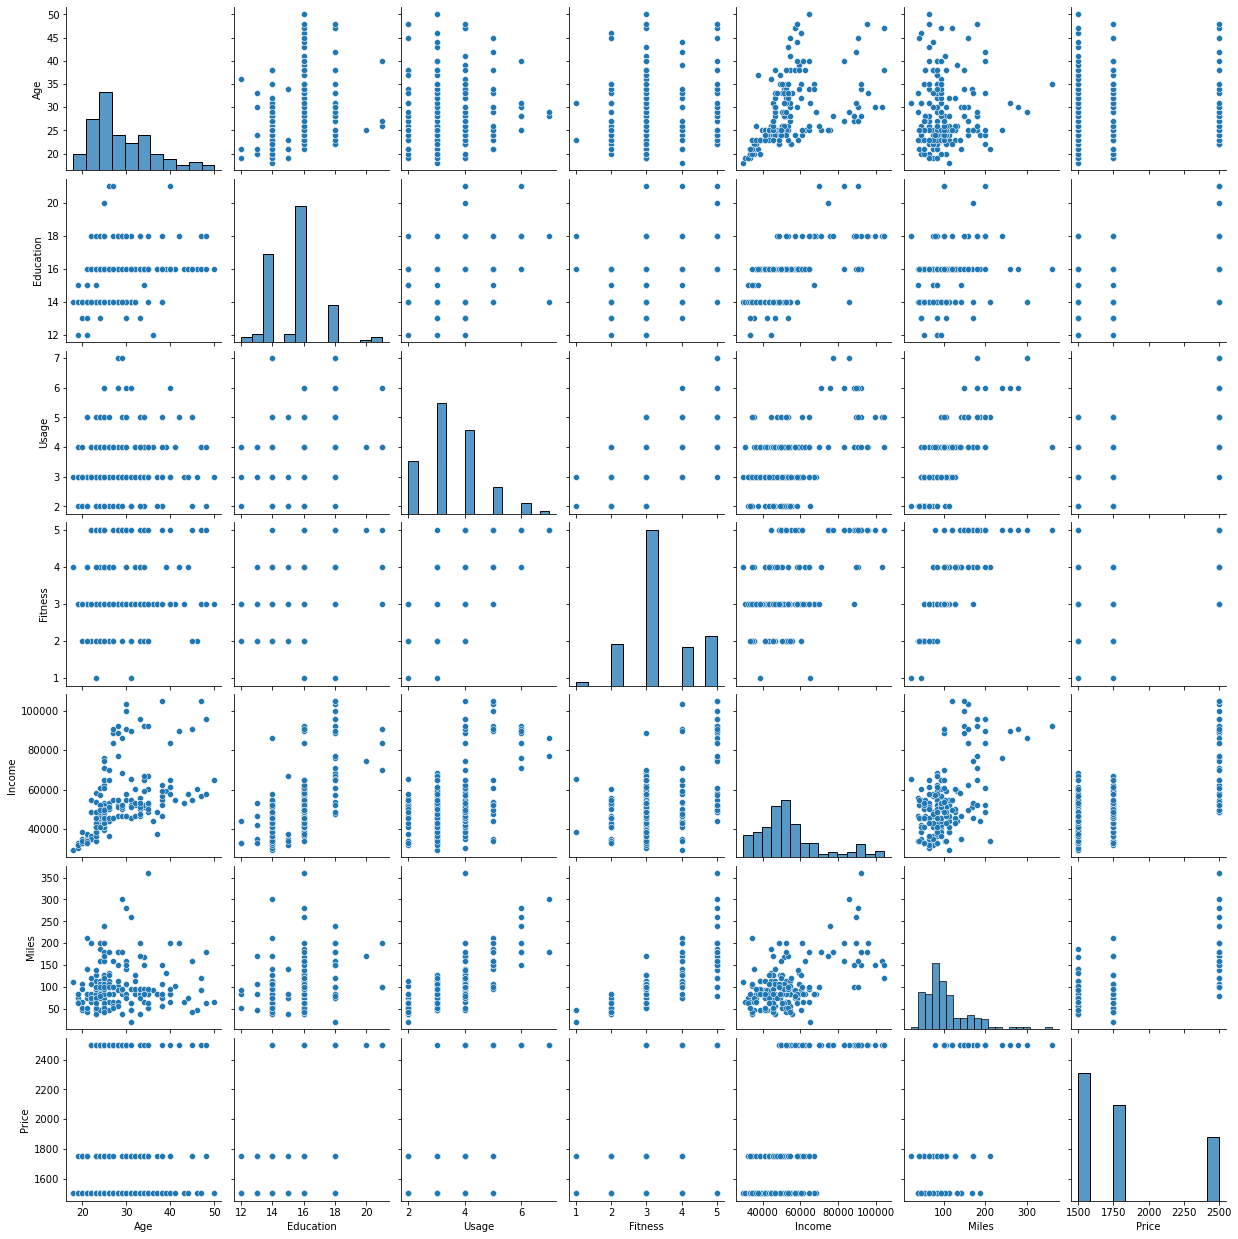

In [138]:
sns.pairplot(aerofit_data)

<AxesSubplot:>

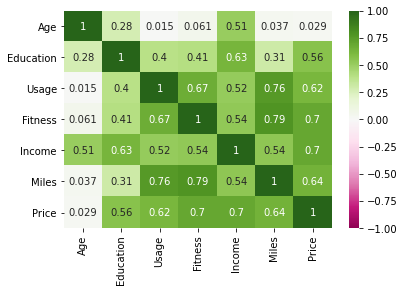

In [139]:
sns.heatmap(aerofit_data.corr(), annot= True, cmap= "PiYG", vmax= 1, vmin= -1)

<AxesSubplot:>

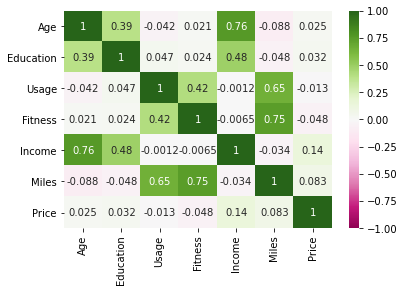

In [140]:
sns.heatmap(aerofit_data[aerofit_data.Product != "KP781"].corr(), annot= True, cmap= "PiYG", vmax= 1, vmin= -1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


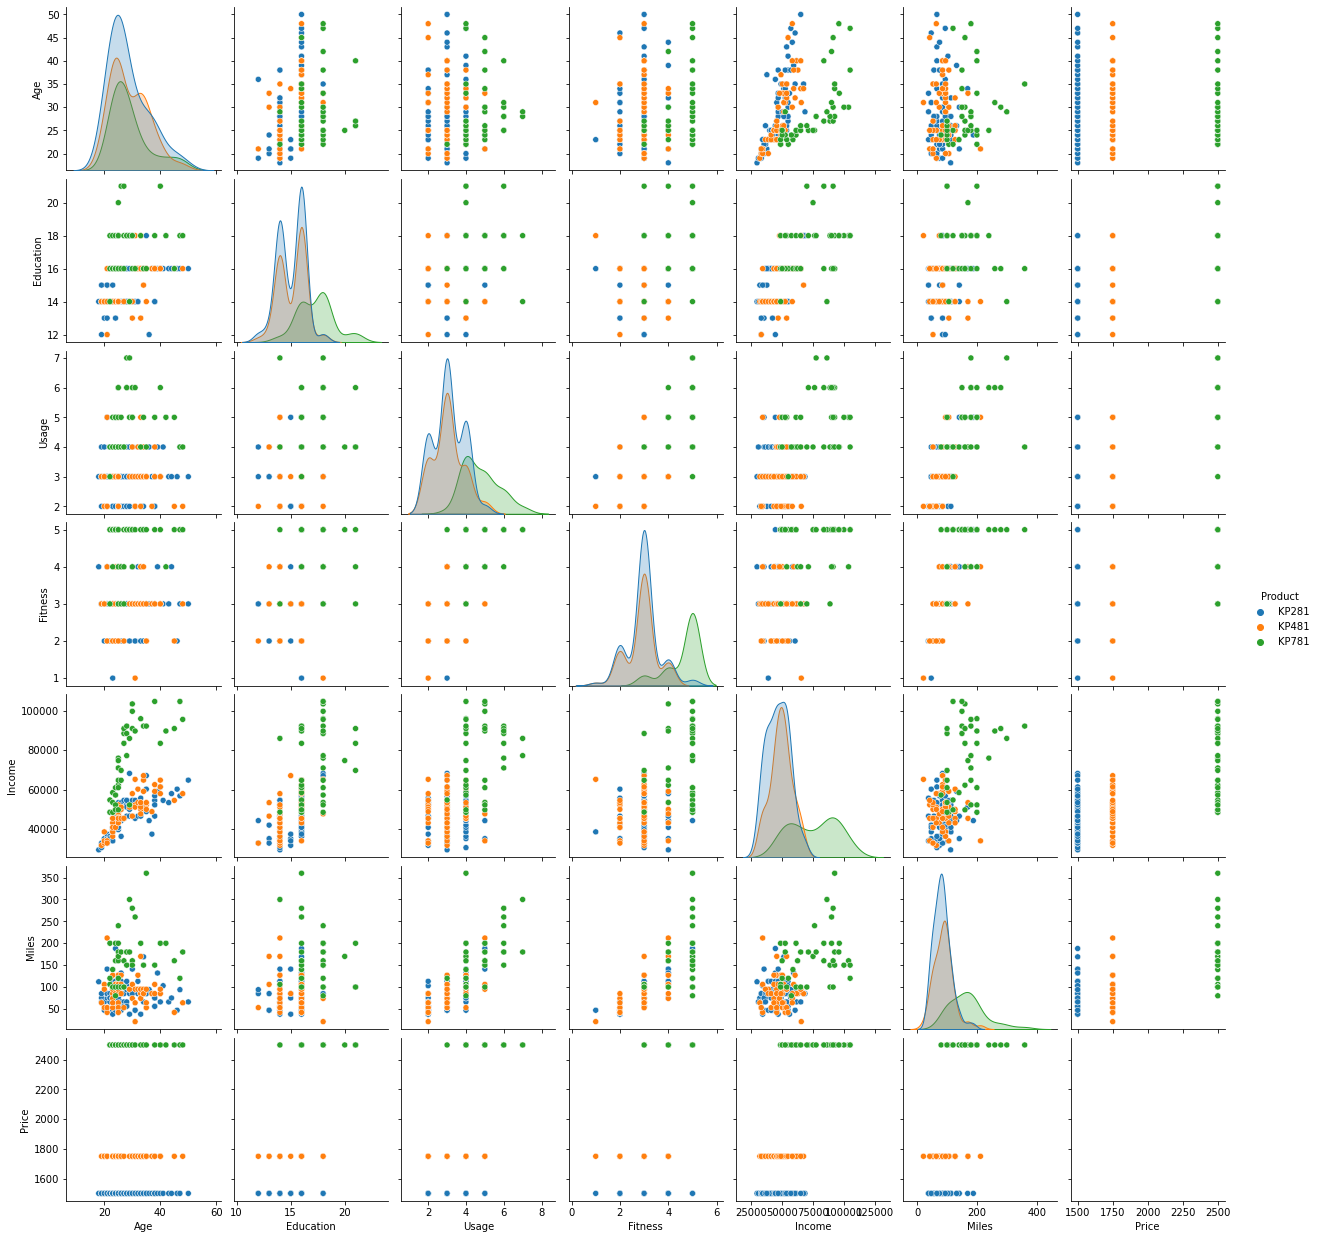

In [141]:
sns.pairplot(aerofit_data, hue= "Product")

Text(0.5, 1.0, 'KP781')

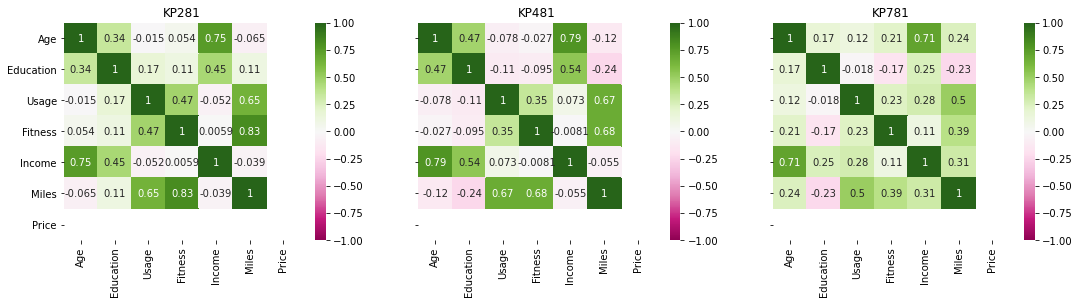

In [142]:
fig, axes = plt.subplots(1, 3, figsize= (18, 4), sharey=True) # 

sns.heatmap(ax= axes[0], data= aerofit_data[aerofit_data.Product == "KP281"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[0].set_title("KP281")
sns.heatmap(ax= axes[1], data= aerofit_data[aerofit_data.Product == "KP481"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[1].set_title("KP481")
sns.heatmap(ax= axes[2], data= aerofit_data[aerofit_data.Product == "KP781"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[2].set_title("KP781")

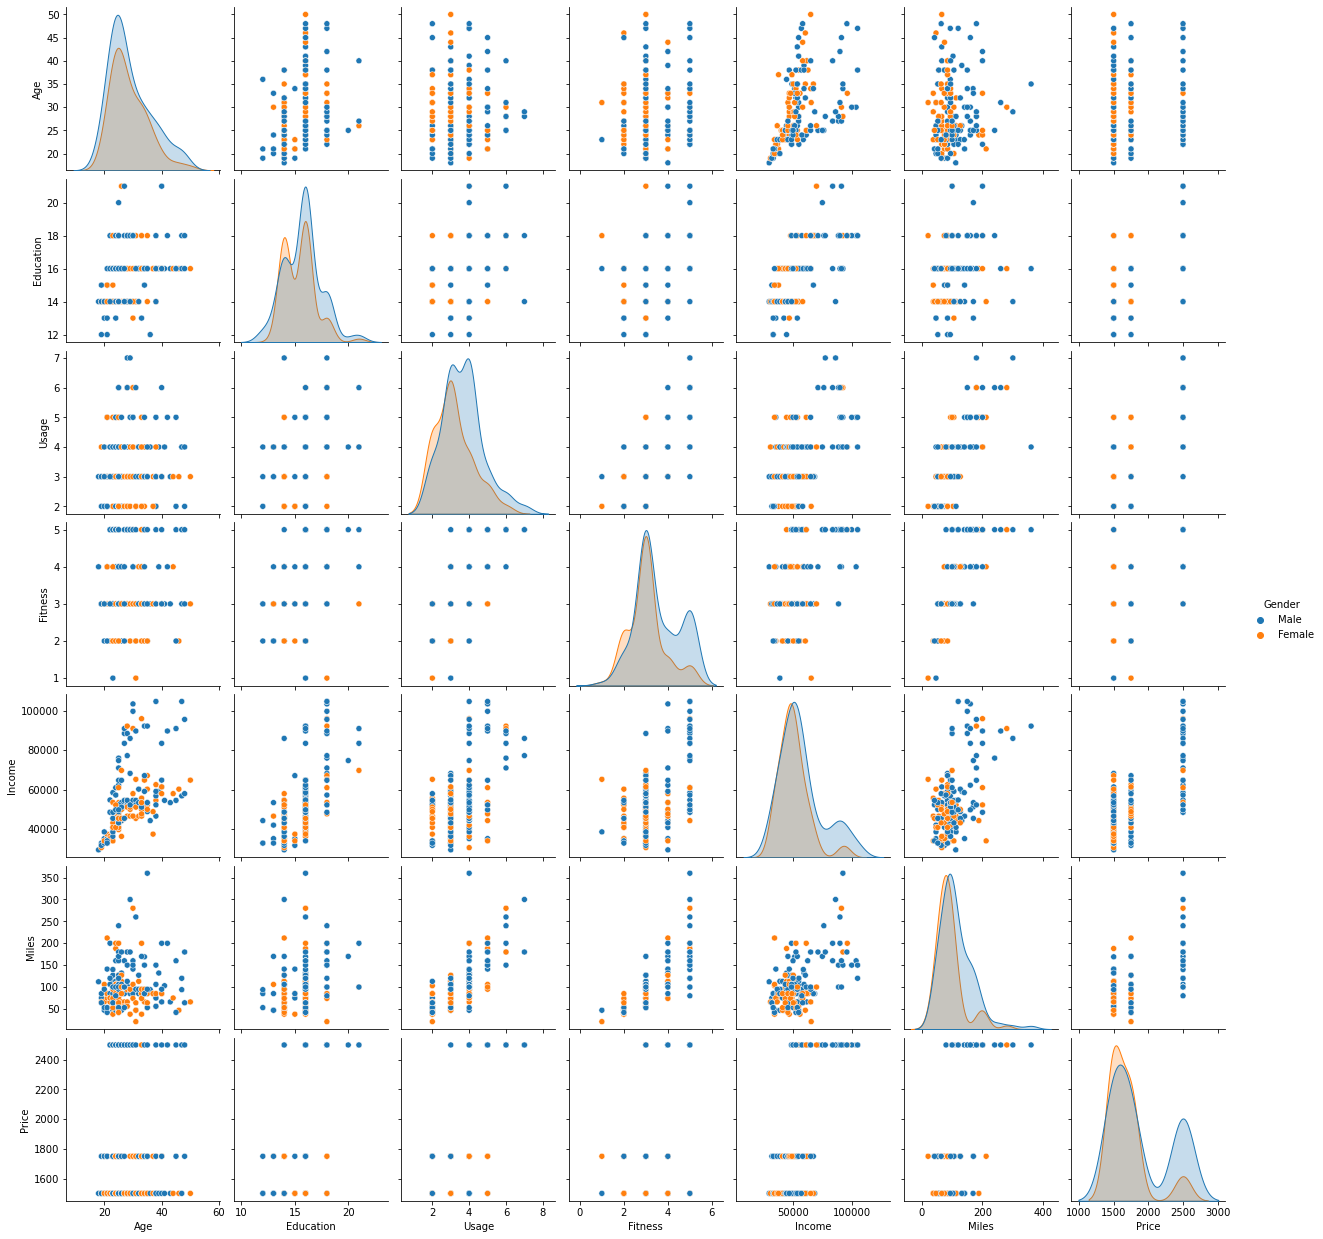

In [143]:
sns.pairplot(aerofit_data, hue= "Gender")

Text(0.5, 1.0, 'Female')

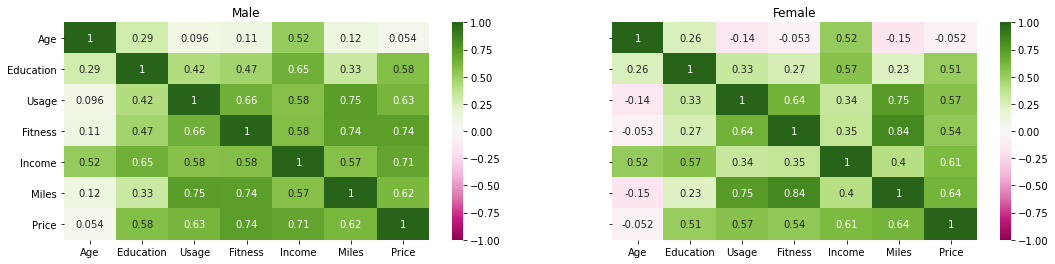

In [144]:
fig, axes = plt.subplots(1, 2, figsize= (18, 4), sharey=True)

sns.heatmap(ax= axes[0], data= aerofit_data[aerofit_data.Gender == "Male"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[0].set_title("Male")
sns.heatmap(ax= axes[1], data= aerofit_data[aerofit_data.Gender == "Female"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[1].set_title("Female")

Text(0.5, 1.0, 'KP781')

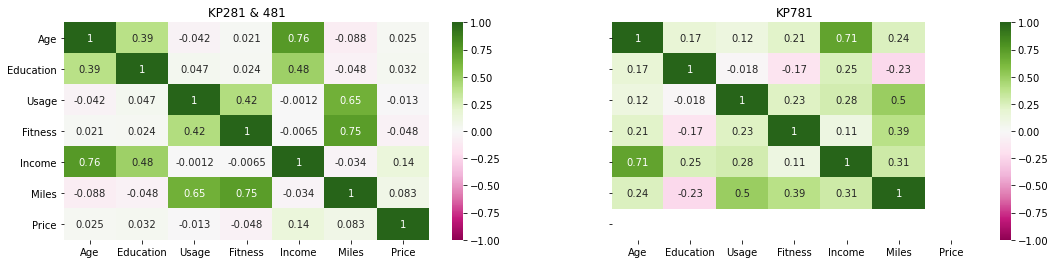

In [145]:
fig, axes = plt.subplots(1, 2, figsize= (18, 4), sharey=True) # 

sns.heatmap(ax= axes[0], data= aerofit_data[aerofit_data.Product != "KP781"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[0].set_title("KP281 & 481")
sns.heatmap(ax= axes[1], data= aerofit_data[aerofit_data.Product == "KP781"].corr(),
            annot= True, cmap= "PiYG", vmax= 1, vmin= -1)
axes[1].set_title("KP781")

#### Redundancy:
* Grouped:
    * Miles, Fitness and Usage are highly correlated
    * Age is highly correlated with Income
* Low:
    * Usage and Fitness are gihly correlated with Miles
    * Age is highly correlated with Income

#### Influencers:
* KP781: High Education, High Usage, High Fitness, High Income, More Miles, Mostly Male (can be seen pairplots)
* KP281 vs 481: Income, Miles

#### Non-Influencers:
* All Products: Age, MaritalStatus
* KP281 vs 481: Gender, Education, Usage, Fitness

#### Steps:
* Make 2 datasets one with KP281 and 481 grouped as KPLOW, and the other excluding KP781
* Call KPLOW vs 781 dataset as grouped and KP281 & 481 dataset as LOw
* First do the portfolio for KP781 by contrasting with KPLOW
* Figure out the portfolio for KP281 and KP481

In [146]:
conditions = [
    (aerofit_data['Product'] == "KP281"),
    (aerofit_data['Product'] == "KP481"),
    (aerofit_data['Product'] == "KP781"),
]

choices = ["KPLOW", "KPLOW", "KP781"]

aerofit_data['ProductGrouped'] = np.select(conditions, choices, default= np.nan)


aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price,ProductGrouped
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0,KPLOW
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0,KPLOW
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0,KPLOW
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0,KPLOW
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0,KPLOW


In [147]:
# aerofit_data.drop(columns= "Product_Grouped", inplace= True)

In [148]:
df_grouped = aerofit_data.copy()

df_grouped.drop(columns= ["Age", "MaritalStatus"], inplace= True)

df_grouped.head()

,Product,Gender,Education,Usage,Fitness,Income,Miles,Price,ProductGrouped
0,KP281,Male,14,3,4,29562,112,1500.0,KPLOW
1,KP281,Male,15,2,3,31836,75,1500.0,KPLOW
2,KP281,Female,14,4,3,30699,66,1500.0,KPLOW
3,KP281,Male,12,3,3,32973,85,1500.0,KPLOW
4,KP281,Male,13,4,2,35247,47,1500.0,KPLOW


In [149]:
pd.crosstab(index= df_grouped.ProductGrouped, columns= df_grouped.Gender, margins= True)

Gender,Female,Male,All
ProductGrouped,,,
KP781,7,33,40
KPLOW,69,71,140
All,76,104,180


In [150]:
pd.crosstab(index= df_grouped.ProductGrouped, columns= df_grouped.Education, margins= True)

Education,12,13,14,15,16,18,20,21,All
ProductGrouped,,,,,,,,,
KP781,0,0,2,0,15,19,1,3,40
KPLOW,3,5,53,5,70,4,0,0,140
All,3,5,55,5,85,23,1,3,180


In [151]:
Education_bins = [11, 15, 21]
df = pd.DataFrame()
df["Education_Bins"] = pd.cut(df_grouped.Education, Education_bins, labels= ["<=15", ">=16"])
df["ProductGrouped"] = df_grouped.ProductGrouped

pd.crosstab(index= df.ProductGrouped, columns= df.Education_Bins, margins= True)

Education_Bins,<=15,>=16,All
ProductGrouped,,,
KP781,2,38,40
KPLOW,66,74,140
All,68,112,180


In [152]:
Education_bins = [11, 15, 21]
df = pd.DataFrame()
df["Education_Bins"] = pd.cut(df_grouped.Education, Education_bins, labels= ["<=15", ">=16"])
df["Gender"] = df_grouped.Gender
df["ProductGrouped"] = df_grouped.ProductGrouped

pd.crosstab(index= df.ProductGrouped, columns= [df.Gender, df.Education_Bins], margins= True)

Gender         Female      Male       All
Education_Bins   <=15 >=16 <=15 >=16     
ProductGrouped                           
KP781               0    7    2   31   40
KPLOW              33   36   33   38  140
All                33   43   35   69  180

In [153]:
pd.crosstab(index= df_grouped.ProductGrouped, columns= df_grouped.Income, margins= True)

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,88396,89641,90886,92131,95508,95866,99601,103336,104581,All
ProductGrouped,,,,,,,,,,,,,,,,,,,,,
KP781,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,1,1,1,1,2,40
KPLOW,1,1,2,5,5,5,4,2,5,2,...,0,0,0,0,0,0,0,0,0,140
All,1,1,2,5,5,5,4,2,5,2,...,2,2,3,3,1,1,1,1,2,180


In [154]:
df_grouped.Income.min(), df_grouped.Income.median(), df_grouped.Income.max()

(29562, 50596.5, 104581)

In [155]:
(df_grouped.Income.min(), df_grouped.Income.quantile(0.25), df_grouped.Income.quantile(0.5),
df_grouped.Income.quantile(0.75), df_grouped.Income.max())

(29562, 44058.75, 50596.5, 58668.0, 104581)

In [156]:
Income_bins = [0, df_grouped.Income.quantile(0.25), df_grouped.Income.quantile(0.5), 
               df_grouped.Income.quantile(0.75), df_grouped.Income.max()]
df = pd.DataFrame()
df["Income_Bins"] = pd.cut(df_grouped.Income, Income_bins, labels= ["25", "50", "75", "100"])
df["ProductGrouped"] = df_grouped.ProductGrouped

pd.crosstab(index= df.ProductGrouped, columns= df.Income_Bins, margins= True)

Income_Bins,25,50,75,100,All
ProductGrouped,,,,,
KP781,0,5,6,29,40
KPLOW,45,40,39,16,140
All,45,45,45,45,180


In [157]:
df = pd.DataFrame()

Education_bins = [11, 15, 21]
df["Education_Bins"] = pd.cut(df_grouped.Education, Education_bins, labels= ["<=15", ">=16"])

df["Gender"] = df_grouped.Gender

Income_bins = [0, df_grouped.Income.median(), df_grouped.Income.max()]
df["Income_Bins"] = pd.cut(df_grouped.Income, Income_bins, labels= ["0-50", "50-100"])

df["ProductGrouped"] = df_grouped.ProductGrouped

pd.crosstab(index= df.ProductGrouped, columns= [df.Gender, df.Education_Bins, df.Income_Bins], margins= True)

Gender         Female                    Male                     All
Education_Bins   <=15        >=16        <=15        >=16            
Income_Bins      0-50 50-100 0-50 50-100 0-50 50-100 0-50 50-100     
ProductGrouped                                                       
KP781               0      0    0      7    1      1    4     27   40
KPLOW              27      6   19     17   25      8   14     24  140
All                27      6   19     24   26      9   18     51  180

In [158]:
pd.crosstab(index= df_grouped.ProductGrouped, columns= df_grouped.Fitness, margins= True)

Fitness,1,2,3,4,5,All
ProductGrouped,,,,,,
KP781,0,0,4,7,29,40
KPLOW,2,26,93,17,2,140
All,2,26,97,24,31,180


In [159]:
df = pd.DataFrame()

Education_bins = [11, 15, 21]
df["Education_Bins"] = pd.cut(df_grouped.Education, Education_bins, labels= ["<=15", ">=16"])

Income_bins = [0, df_grouped.Income.median(), df_grouped.Income.max()]
df["Income_Bins"] = pd.cut(df_grouped.Income, Income_bins, labels= ["0-50", "50-100"])

df["Gender"] = df_grouped.Gender

Fitness_bins = [0, 3, 5]
df["Fitness_Bins"] = pd.cut(df_grouped.Fitness, Fitness_bins, labels= ["1-3", "4-5"])

df["ProductGrouped"] = df_grouped.ProductGrouped

pd.crosstab(index= df.ProductGrouped, columns= [df.Fitness_Bins, df.Income_Bins, df.Education_Bins,
                                                df.Gender], margins= True)

Fitness_Bins      1-3                                             4-5       \
Income_Bins      0-50                  50-100                    0-50        
Education_Bins   <=15        >=16        <=15        >=16        <=15        
Gender         Female Male Female Male Female Male Female Male Female Male   
ProductGrouped                                                               
KP781               0    1      0    0      0    0      1    2      0    0   
KPLOW              23   20     16   12      6    7     16   21      4    5   
All                23   21     16   12      6    7     17   23      4    5   

Fitness_Bins                                   All  
Income_Bins                50-100                   
Education_Bins   >=16        <=15   >=16            
Gender         Female Male   Male Female Male       
ProductGrouped                                      
KP781               0    4      1      6   25   40  
KPLOW               3    2      1      1    3  140  
All                 3    6      2      7   28  180

In [160]:
pd.crosstab(index= df.ProductGrouped, columns= [df.Fitness_Bins, df.Income_Bins, df.Education_Bins,
                                                df.Gender], margins= True, normalize='columns').T

ProductGrouped                                     KP781     KPLOW
Fitness_Bins Income_Bins Education_Bins Gender                    
1-3          0-50        <=15           Female  0.000000  1.000000
                                        Male    0.047619  0.952381
                         >=16           Female  0.000000  1.000000
                                        Male    0.000000  1.000000
             50-100      <=15           Female  0.000000  1.000000
                                        Male    0.000000  1.000000
                         >=16           Female  0.058824  0.941176
                                        Male    0.086957  0.913043
4-5          0-50        <=15           Female  0.000000  1.000000
                                        Male    0.000000  1.000000
                         >=16           Female  0.000000  1.000000
                                        Male    0.666667  0.333333
             50-100      <=15           Male    0.500000  0.500000
                         >=16           Female  0.857143  0.142857
                                        Male    0.892857  0.107143
All                                             0.222222  0.777778

In [161]:
pd.crosstab(index= df.ProductGrouped, columns= [df.Fitness_Bins, df.Income_Bins, df.Education_Bins,
                                                df.Gender], normalize='columns'
           ).T.sort_values(["KP781", "KPLOW"], ascending= False)

ProductGrouped                                     KP781     KPLOW
Fitness_Bins Income_Bins Education_Bins Gender                    
4-5          50-100      >=16           Male    0.892857  0.107143
                                        Female  0.857143  0.142857
             0-50        >=16           Male    0.666667  0.333333
             50-100      <=15           Male    0.500000  0.500000
1-3          50-100      >=16           Male    0.086957  0.913043
                                        Female  0.058824  0.941176
             0-50        <=15           Male    0.047619  0.952381
                                        Female  0.000000  1.000000
                         >=16           Female  0.000000  1.000000
                                        Male    0.000000  1.000000
             50-100      <=15           Female  0.000000  1.000000
                                        Male    0.000000  1.000000
4-5          0-50        <=15           Female  0.000000  1.000000
                                        Male    0.000000  1.000000
                         >=16           Female  0.000000  1.000000

#### Further Steps:

* Probability of buying KP781 or KPLOW given each dimension: Gender, Education, Income, Fitness
* Probability of buying KP781 or KPLOW given each dimension in cummulative order: Gender, Education, Income, Fitness

##### Probability of Buying KP781:

In [162]:
df = df_grouped.copy()

df.head()

,Product,Gender,Education,Usage,Fitness,Income,Miles,Price,ProductGrouped
0,KP281,Male,14,3,4,29562,112,1500.0,KPLOW
1,KP281,Male,15,2,3,31836,75,1500.0,KPLOW
2,KP281,Female,14,4,3,30699,66,1500.0,KPLOW
3,KP281,Male,12,3,3,32973,85,1500.0,KPLOW
4,KP281,Male,13,4,2,35247,47,1500.0,KPLOW


#### Given Gender:

* $P(Product = KP781 | Gender = Male)$
* $P(Product = KP781 | Gender = Female)$

In [163]:
# P(Product = KP781 | Gender = Male)

p_KP781_Male = df[(df.ProductGrouped == "KP781") & (df.Gender == "Male")].shape[0]/df[(df.Gender == "Male")].shape[0]

# P(Product = KP781 | Gender = Female)

p_KP781_Female = df[(df.ProductGrouped == "KP781") & (df.Gender == "Female")].shape[0]/df[(df.Gender == "Female")].shape[0]

p_KP781_Male, p_KP781_Female

(0.3173076923076923, 0.09210526315789473)

#### Given Education:

* $P(Product = KP781 | Education <= 15)$
* $P(Product = KP781 | Educaiton >= 16)$

In [164]:
# P(Product = KP781 | Education <= 15)

p_KP781_Education_atmost_15 = (df[(df.ProductGrouped == "KP781") & (df.Education <= 15)].shape[0]
                               /df[(df.Education <= 15)].shape[0])

# P(Product = KP781 | Education >= 16)

p_KP781_Education_atleast_16 = (df[(df.ProductGrouped == "KP781") & (df.Education >= 16)].shape[0]
                               /df[(df.Education >= 16)].shape[0])

p_KP781_Education_atmost_15, p_KP781_Education_atleast_16

(0.029411764705882353, 0.3392857142857143)

In [165]:
Income_bins = [0, df_grouped.Income.median(), df_grouped.Income.max()]

Income_bins

[0, 50596.5, 104581]

#### Given Income:

* $P(Product = KP781 | Income <= 50000)$
* $P(Product = KP781 | Income >= 50000)$

In [166]:
# P(Product = KP781 | Income <= 50000)

p_KP781_Income_atmost_50k = (df[(df.ProductGrouped == "KP781") & (df.Income <= 50000)].shape[0]
                               /df[(df.Income <= 50000)].shape[0])

# P(Product = KP781 | Income >= 50000)

p_KP781_Income_atleast_50k = (df[(df.ProductGrouped == "KP781") & (df.Income >= 50000)].shape[0]
                               /df[(df.Income >= 50000)].shape[0])

p_KP781_Income_atmost_50k, p_KP781_Income_atleast_50k

(0.060240963855421686, 0.36082474226804123)

#### Given Fitness:

* $P(Product = KP781 | Fitness <= 3)$
* $P(Product = KP781 | Fitness >= 4)$

In [167]:
# P(Product = KP781 | Fitness <= 3)

p_KP781_Fitness_atmost_3 = (df[(df.ProductGrouped == "KP781") & (df.Fitness <= 3)].shape[0]
                               /df[(df.Fitness <= 3)].shape[0])

# P(Product = KP781 | Fitness >= 4)

p_KP781_Fitness_atleast_4 = (df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4)].shape[0]
                               /df[(df.Fitness >= 4)].shape[0])

p_KP781_Fitness_atmost_3, p_KP781_Fitness_atleast_4

(0.032, 0.6545454545454545)

In [168]:
conds = np.array(["Male", "Female", "Education <= 15", "Education >= 16", "Income <= 50k",
                  "Income >= 50k", "Fitness <= 3", "Fitness >= 4"])
probs = np.array([p_KP781_Male, p_KP781_Female, p_KP781_Education_atmost_15, p_KP781_Education_atleast_16,
                  p_KP781_Income_atmost_50k, p_KP781_Income_atleast_50k,
                  p_KP781_Fitness_atmost_3, p_KP781_Fitness_atleast_4])

args = np.argsort(probs)[::-1]

probs_sorted = probs[args]
conds_sorted = conds[args]

conds_sorted[probs_sorted >= 0.3]

array(['Fitness >= 4', 'Income >= 50k', 'Education >= 16', 'Male'],
      dtype='<U15')

#### Observations:

* The following conditions are the most useful to determine whether someone would buy KP781
    * Fitness >= 4
    * Income >= 50k
    * Education >= 16
    * Gender = Male

##### Given Fitness >= 4:

* $P(Product = KP781 | Fitness >= 4)$

In [169]:
# P(Product = KP781 | Fitness >= 4)

p_KP781_Fitness_atleast_4 = (df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4)].shape[0]
                               /df[(df.Fitness >= 4)].shape[0])

p_KP781_Fitness_atleast_4

0.6545454545454545

##### Given Fitness >= 4 and Income >= 50k:

* $P(Product = KP781 | Fitness >= 4 \& Income >= 50k)$

In [170]:
# P(Product = KP781 | Fitness >= 4 & Income >= 50k))

p_KP781_Fitness_atleast_4_Income_atleast_50k = (
    df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4) & (df.Income >= 50000)].shape[0]
    / df[(df.Fitness >= 4) & (df.Income >= 50000)].shape[0]
)

p_KP781_Fitness_atleast_4_Income_atleast_50k

0.8421052631578947

##### Given Fitness >= 4 and Income >= 50k and Educaiton >= 16:

* $P(Product = KP781 | Fitness >= 4 \& Income >= 50k \& Education >= 16)$

In [171]:
# P(Product = KP781 | Fitness >= 4 & Income >= 50k & Educaiton >= 16))

p_KP781_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16 = (
    df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4) & (df.Income >= 50000) & (df.Education >= 16)].shape[0]
    / df[(df.Fitness >= 4) & (df.Income >= 50000) & (df.Education >= 16)].shape[0]
)

p_KP781_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16

0.8611111111111112

##### Given Fitness >= 4 and Income >= 50k and Educaiton >= 16 and Gender = Male:

* $P(Product = KP781 | Fitness >= 4 \& Income >= 50k \& Education >= 16 \& Gender = Male)$

In [172]:
# P(Product = KP781 | Fitness >= 4 & Income >= 50k & Educaiton >= 16 & Gender = Male))

p_KP781_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male = (
    df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4) & (df.Income >= 50000)
       & (df.Education >= 16) & (df.Gender == "Male")].shape[0]
    / df[(df.Fitness >= 4) & (df.Income >= 50000) & (df.Education >= 16) & (df.Gender == "Male")].shape[0]
)

p_KP781_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male

0.8928571428571429

##### Given Fitness >= 4 and Income >= 50k and Educaiton >= 16 and Gender = Male:

* $P(Fitness >= 4 \& Income >= 50k \& Education >= 16 \& Gender = Male | Product = KP781)$

In [173]:
# P(Fitness >= 4 & Income >= 50k & Educaiton >= 16 & Gender = Male | Product = KP781)

p_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male_KP781 = (
    df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4) & (df.Income >= 50000)
       & (df.Education >= 16) & (df.Gender == "Male")].shape[0]
    / df[(df.ProductGrouped == "KP781")].shape[0]
)

p_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male_KP781

0.625

##### Given Fitness >= 4 or Income >= 50k or Educaiton >= 16 or Gender = Male:

* $P(Product = KP781 | Fitness >= 4 || Income >= 50k || Education >= 16 || Gender = Male)$

In [174]:
# P(Fitness >= 4 || Income >= 50k || Educaiton >= 16 || Gender = Male | Product = KP781)

p_KP781_or_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male = (
    df[(df.ProductGrouped == "KP781") & ((df.Fitness >= 4) | (df.Income >= 50000)
       | (df.Education >= 16) | (df.Gender == "Male"))].shape[0]
    / df[(df.Fitness >= 4) | (df.Income >= 50000) | (df.Education >= 16) | (df.Gender == "Male")].shape[0]
)

p_KP781_or_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male

0.25477707006369427

##### Given Fitness >= 4 or Income >= 50k or Educaiton >= 16 or Gender = Male:

* $P(Fitness >= 4 || Income >= 50k || Education >= 16 || Gender = Male | Product = KP781)$

In [175]:
# P(Fitness >= 4 || Income >= 50k || Educaiton >= 16 || Gender = Male | Product = KP781)

p_or_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male_KP781 = (
    df[(df.ProductGrouped == "KP781") & ((df.Fitness >= 4) | (df.Income >= 50000)
       | (df.Education >= 16) | (df.Gender == "Male"))].shape[0]
    / df[(df.ProductGrouped == "KP781")].shape[0]
)

p_or_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Male_KP781

1.0

##### Given Fitness >= 4 and Income >= 50k and Educaiton >= 16 and Gender = Female:

* $P(Product = KP781 | Fitness >= 4 \& Income >= 50k \& Education >= 16 \& Gender = Female)$

In [176]:
# P(Product = KP781 | Fitness >= 4 & Income >= 50k & Educaiton >= 16 & Gender = Female))

p_KP781_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Female = (
    df[(df.ProductGrouped == "KP781") & (df.Fitness >= 4) & (df.Income >= 50000)
       & (df.Education >= 16) & (df.Gender == "Female")].shape[0]
    / df[(df.Fitness >= 4) & (df.Income >= 50000) & (df.Education >= 16) & (df.Gender == "Female")].shape[0]
)

p_KP781_Fitness_atleast_4_Income_atleast_50k_Education_atleast_16_Female

0.75

#### Steps:

* Filter out the customer data for KP781
* Find out the most influential data among the influencing features

In [177]:
df_low = aerofit_data.copy()

df_low.drop(df_low[df_low.ProductGrouped != "KPLOW"].index, axis= 0, inplace= True)

df_low.drop(columns= ["Age", "MaritalStatus", "Usage", "Price", "ProductGrouped"], inplace= True)

df_low.head()

,Product,Gender,Education,Fitness,Income,Miles
0,KP281,Male,14,4,29562,112
1,KP281,Male,15,3,31836,75
2,KP281,Female,14,3,30699,66
3,KP281,Male,12,3,32973,85
4,KP281,Male,13,2,35247,47


In [178]:
pd.crosstab(index= df_low.Product, columns= df_low.Gender, margins= True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
All,69,71,140


In [179]:
pd.crosstab(index= df_low.Product, columns= df_low.Fitness, margins= True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
All,2,26,93,17,2,140


In [180]:
pd.crosstab(index= df_low.Product, columns= df_low.Education, margins= True)

Education,12,13,14,15,16,18,All
Product,,,,,,,
KP281,2,3,30,4,39,2,80
KP481,1,2,23,1,31,2,60
All,3,5,53,5,70,4,140


In [181]:
df_low = aerofit_data.copy()

df_low.drop(df_low[df_low.ProductGrouped != "KPLOW"].index, axis= 0, inplace= True)

df_low.drop(columns= ["Age", "MaritalStatus", "Gender", "Education",
                      "Fitness", "Usage", "Price", "ProductGrouped"], inplace= True)

df_low.head()

,Product,Income,Miles
0,KP281,29562,112
1,KP281,31836,75
2,KP281,30699,66
3,KP281,32973,85
4,KP281,35247,47


In [182]:
pd.crosstab(index= df_low.Product, columns= df_low.Income, margins= True)

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,57987,59124,60261,61398,62535,64809,65220,67083,68220,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,1,1,3,2,5,3,2,3,2,...,1,1,2,1,0,1,0,1,1,80
KP481,0,0,1,2,3,0,1,0,2,0,...,3,2,1,1,1,2,1,1,0,60
All,1,1,2,5,5,5,4,2,5,2,...,4,3,3,2,1,3,1,2,1,140


In [183]:
Income_bins = [0, df_low.Income.quantile(0.25), df_low.Income.quantile(0.5), 
               df_low.Income.quantile(0.75), df_low.Income.max()]
df = pd.DataFrame()
df["Income_Bins"] = pd.cut(df_low.Income, Income_bins, labels= ["25", "50", "75", "100"])

df["Product"] = df_low.Product

pd.crosstab(index= df.Product, columns= df.Income_Bins, margins= True)

Income_Bins,25,50,75,100,All
Product,,,,,
KP281,27,19,16,18,80
KP481,11,14,22,13,60
All,38,33,38,31,140


In [184]:
Income_bins = [0, df_low.Income.quantile(0.25), df_low.Income.quantile(0.75), df_low.Income.max()]
df = pd.DataFrame()
df["Income_Bins"] = pd.cut(df_low.Income, Income_bins, labels= ["0-25", "25-75", "100"])

df["Product"] = df_low.Product

pd.crosstab(index= df.Product, columns= df.Income_Bins, margins= True)

Income_Bins,0-25,25-75,100,All
Product,,,,
KP281,27,35,18,80
KP481,11,36,13,60
All,38,71,31,140


In [185]:
Income_bins = [0, df_low.Income.quantile(0.25), df_low.Income.max()]
df = pd.DataFrame()
df["Income_Bins"] = pd.cut(df_low.Income, Income_bins, labels= ["0-25", "25-100"])

df["Product"] = df_low.Product

pd.crosstab(index= df.Product, columns= df.Income_Bins, margins= True)

Income_Bins,0-25,25-100,All
Product,,,
KP281,27,53,80
KP481,11,49,60
All,38,102,140


In [186]:
pd.crosstab(index= df_low.Product, columns= df_low.Miles, margins= True)

Miles,21,38,42,47,53,56,64,66,74,75,...,112,113,127,132,141,169,170,188,212,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0,3,0,9,0,6,0,10,0,10,...,1,8,0,2,2,1,0,1,0,80
KP481,1,0,4,0,7,0,6,0,3,0,...,0,0,5,0,0,0,2,0,1,60
All,1,3,4,9,7,6,6,10,3,10,...,1,8,5,2,2,1,2,1,1,140


In [187]:
Miles_bins = [0, df_low.Miles.quantile(0.25), df_low.Miles.quantile(0.5), 
               df_low.Miles.quantile(0.75), df_low.Miles.max()]
df = pd.DataFrame()
df["Miles_Bins"] = pd.cut(df_low.Miles, Miles_bins, labels= ["25", "50", "75", "100"])

df["Product"] = df_low.Product

pd.crosstab(index= df.Product, columns= df.Miles_Bins, margins= True)

Miles_Bins,25,50,75,100,All
Product,,,,,
KP281,18,36,8,18,80
KP481,18,14,12,16,60
All,36,50,20,34,140


In [188]:
df = pd.DataFrame()
Income_bins = [0, df_low.Income.quantile(0.25), df_low.Income.max()]
df["Income_Bins"] = pd.cut(df_low.Income, Income_bins, labels= ["0-25", "25-100"])

Miles_bins = [0, df_low.Miles.quantile(0.25), df_low.Miles.quantile(0.5), 
               df_low.Miles.quantile(0.75), df_low.Miles.max()]
df["Miles_Bins"] = pd.cut(df_low.Miles, Miles_bins, labels= ["25", "50", "75", "100"])

df["Product"] = df_low.Product

pd.crosstab(index= df.Product, columns= [df.Miles_Bins, df.Income_Bins], margins= True)

Miles_Bins    25          50          75         100         All
Income_Bins 0-25 25-100 0-25 25-100 0-25 25-100 0-25 25-100     
Product                                                         
KP281          4     14   15     21    2      6    6     12   80
KP481          5     13    2     12    2     10    2     14   60
All            9     27   17     33    4     16    8     26  140

In [189]:
Income_bins = [0, df_low.Income.quantile(0.25), df_low.Income.max()]
Income_bins

[0, 40932.0, 68220]

In [190]:
Miles_bins = [0, df_low.Miles.quantile(0.25), df_low.Miles.quantile(0.5), 
               df_low.Miles.quantile(0.75), df_low.Miles.max()]

Miles_bins

[0, 64.0, 85.0, 95.0, 212]

In [191]:
Miles_bins = [0, df_grouped.Miles.quantile(0.25), df_grouped.Miles.quantile(0.5), 
               df_grouped.Miles.quantile(0.75), df_grouped.Miles.max()]

Miles_bins

[0, 66.0, 94.0, 114.75, 360]

#### Observaions:

* The following further binning of Income is helpful in determining the probability of buying KP284 or 481
    * Income <= 40000 and Income <= 50000
* Though the information on miles is helpful since it is highly correlated to Fitness and also may not be available before the customer purchases the feature miles of the customer is ignored

In [196]:
df = pd.DataFrame()

Education_bins = [11, 15, 21]
df["Education_Bins"] = pd.cut(df_grouped.Education, Education_bins, labels= ["<=15", ">=16"])

Income_bins = [0, 40000, 50000, df_grouped.Income.max()]
df["Income_Bins"] = pd.cut(df_grouped.Income, Income_bins, labels= ["0-40", "40-50", "50-100"])

df["Gender"] = df_grouped.Gender

Fitness_bins = [0, 3, 5]
df["Fitness_Bins"] = pd.cut(df_grouped.Fitness, Fitness_bins, labels= ["1-3", "4-5"])

df["ProductGrouped"] = df_grouped.ProductGrouped

df["Product"] = df_grouped.Product

pd.crosstab(index= df.Product, columns= [df.Fitness_Bins, df.Income_Bins,
                                                df.Education_Bins, df.Gender], margins= True)

Fitness_Bins      1-3                                                       \
Income_Bins      0-40                   40-50                  50-100        
Education_Bins   <=15        >=16        <=15        >=16        <=15        
Gender         Female Male Female Male Female Male Female Male Female Male   
Product                                                                      
KP281               9    6      4    2      6    4      4    5      3    6   
KP481               1    6      0    1      7    4      4    2      3    1   
KP781               0    0      0    0      0    1      0    0      0    0   
All                10   12      4    3     13    9      8    7      6    7   

Fitness_Bins    ...    4-5                                                  \
Income_Bins     ...   0-40       40-50                  50-100               
Education_Bins  ...   <=15        <=15        >=16        <=15   >=16        
Gender          ... Female Male Female Male Female Male   Male Female Male   
Product         ...                                                          
KP281           ...      0    2      2    1      1    2      0      1    2   
KP481           ...      1    0      1    2      1    0      1      1    1   
KP781           ...      0    0      0    0      0    4      1      6   25   
All             ...      1    2      3    3      2    6      2      8   28   

Fitness_Bins    All  
Income_Bins          
Education_Bins       
Gender               
Product              
KP281            80  
KP481            60  
KP781            40  
All             180  

[4 rows x 22 columns]

In [197]:
pd.crosstab(index= df.Product, columns= [df.Fitness_Bins, df.Income_Bins, df.Education_Bins,
                                                df.Gender], normalize='index'
           ).T.sort_values(["KP781", "KP481", "KP281"], ascending= False)

Product                                          KP281     KP481  KP781
Fitness_Bins Income_Bins Education_Bins Gender                         
4-5          50-100      >=16           Male    0.0250  0.016667  0.625
                                        Female  0.0125  0.016667  0.150
             40-50       >=16           Male    0.0250  0.000000  0.100
1-3          50-100      >=16           Male    0.1250  0.216667  0.050
                                        Female  0.1250  0.166667  0.025
             40-50       <=15           Male    0.0500  0.066667  0.025
4-5          50-100      <=15           Male    0.0000  0.016667  0.025
1-3          40-50       <=15           Female  0.0750  0.116667  0.000
             0-40        <=15           Male    0.0750  0.100000  0.000
             40-50       >=16           Female  0.0500  0.066667  0.000
             50-100      <=15           Female  0.0375  0.050000  0.000
             40-50       >=16           Male    0.0625  0.033333  0.000
4-5          40-50       <=15           Male    0.0125  0.033333  0.000
1-3          0-40        <=15           Female  0.1125  0.016667  0.000
             50-100      <=15           Male    0.0750  0.016667  0.000
             0-40        >=16           Male    0.0250  0.016667  0.000
4-5          40-50       <=15           Female  0.0250  0.016667  0.000
                         >=16           Female  0.0125  0.016667  0.000
             0-40        <=15           Female  0.0000  0.016667  0.000
1-3          0-40        >=16           Female  0.0500  0.000000  0.000
4-5          0-40        <=15           Male    0.0250  0.000000  0.000

In [198]:
df_val = pd.crosstab(index= df.Product, columns= [df.Fitness_Bins, df.Income_Bins, df.Education_Bins,
                                                df.Gender], normalize='columns'
           ).T.sort_values(["KP781", "KP481", "KP281"], ascending= False)

cm = sns.light_palette("green", as_cmap=True)

df_val.style.background_gradient(cmap=cm).set_precision(2)

#### Steps:

* Make a table of highlighted probabilities for each conditional row
* Make a column showing the p-value that tests the hypothesis that buying any of the product is equally likely irrespective of the customer details (p(X) = 0.33)
* 1 - P-value represents the strength of null hypothesis being rejected i.e. it indicateds the reliability of the probabilities

In [199]:
df_val = pd.crosstab(index= df.Product, columns= [df.Fitness_Bins, df.Income_Bins, df.Education_Bins, df.Gender]).T

df_val["1 - P_value"] = df_val.apply(
                            lambda x: 1 - (
                                (0.33**x.KP281)*(0.33**x.KP481)*(0.33**x.KP781)
                                * (mt.factorial(x.KP281 + x.KP481 + x.KP781)
                                      / (mt.factorial(x.KP281)*mt.factorial(x.KP481)*mt.factorial(x.KP781)))
                            ),
                            axis= 1
                        )

df_val["KP281_p"] = df_val.apply(lambda x: x.KP281/(x.KP281 + x.KP481 + x.KP781), axis= 1)
df_val["KP481_p"] = df_val.apply(lambda x: x.KP481/(x.KP281 + x.KP481 + x.KP781), axis= 1)
df_val["KP781_p"] = df_val.apply(lambda x: x.KP781/(x.KP281 + x.KP481 + x.KP781), axis= 1)

df_val.sort_values(["KP781_p", "KP481_p", "KP281_p"], ascending= False, inplace= True)

cm = sns.light_palette("green", as_cmap=True)

df_val[["KP781_p", "KP481_p", "KP281_p", "1 - P_value"]].style.background_gradient(cmap=cm).set_precision(2)

#### Recommendation:

* If a customer is Very fit (rating 4 to 5 out of 5) and earns an income more than \\$ 50 K and has an education of more than equal to 16 years then it is highly likely the customer is going to purchase KP781
* If a Male customer is not so fit (rating 1 to 3 out of 5) and earns an income more than \\$ 40 K then it is highly likely that he is going to buy KP281
* If a Female customer is not so fit (rating 1 to 3 out of 5) and earns an income less than \\$ 40 K then it is highly likely that she is going to buy KP281
* If a Male customer is very fit (rating 4 to 5 out of 5) and earns an income less than \\$ 40 K and he is also educated for less than equal to 15 years then it is highly likely that he is going to buy KP281